In [ ]:

import numpy as np 
import pandas as pd 


## Data Dictionary:
- Voltage_measured: Fuel Cell terminal voltage (Volts)
- Current_measured: Fuel Cell output current (Amps)
- Temperature_measured: Fuel Cell temperature (degree C)
- Current_load: Current measured at load (Amps)
- Voltage_load: Voltage measured at load (Volts)
- Time: Time vector for the cycle (seconds)
- Capacity: Fuel Cell capacity (Ahr) for discharge till 2.7V
- Datetime: the date and time of the start of the cycle
- Ambient_temperature: Temperature in which the fuel cell is stored (degree C)
- Cycle: Charge cycle of the fuel cell

### Importing libraries:


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Converting the matlab files to csv:

In [ ]:
def load_data(nm,battery): 
    mat = loadmat(nm)
    counter = 0
    dataset = []
    capacity_data = []
  
    for i in range(len(mat[battery][0, 0]['cycle'][0])):
        row = mat[battery][0, 0]['cycle'][0, i]
        if row['type'][0] == 'discharge' :
            ambient_temperature = row['ambient_temperature'][0][0]
            date_time = datetime.datetime(int(row['time'][0][0]),
                                   int(row['time'][0][1]),
                                   int(row['time'][0][2]),
                                   int(row['time'][0][3]),
                                   int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
            data = row['data']
            capacity = data[0][0]['Capacity'][0][0]
            for j in range(len(data[0][0]['Voltage_measured'][0])):
                voltage_measured = data[0][0]['Voltage_measured'][0][j]
                current_measured = data[0][0]['Current_measured'][0][j]
                temperature_measured = data[0][0]['Temperature_measured'][0][j]
                current_load = data[0][0]['Current_load'][0][j]
                voltage_load = data[0][0]['Voltage_load'][0][j]
                time = data[0][0]['Time'][0][j]
                dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                                voltage_measured, current_measured,
                                temperature_measured, current_load,
                                voltage_load, time])
                capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
                counter = counter + 1
    return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]

In [ ]:
B0005_dataset, B0005_capacity = load_data('../input/B0005.mat','B0005')
B0005_dataset['flag'] = 1

In [ ]:
B0006_dataset, B0006_capacity = load_data('../input/B0006.mat','B0006')
B0006_dataset['flag'] = 2

In [ ]:
B0007_dataset, B0007_capacity = load_data('../input/B0007.mat','B0007')
B0007_dataset['flag'] = 3

In [ ]:
B0018_dataset, B0018_capacity = load_data('../input/B0018.mat','B0018')
B0018_dataset['flag'] = 4

In [8]:
fuel_cells_df = pd.concat([B0005_dataset,B0006_dataset,B0007_dataset,B0018_dataset], ignore_index = True)

In [9]:
fuel_cells_df

cycle  ambient_temperature            datetime  capacity  \
0           1                   24 2008-04-02 15:25:41  1.856487   
1           2                   24 2008-04-02 15:25:41  1.856487   
2           3                   24 2008-04-02 15:25:41  1.856487   
3           4                   24 2008-04-02 15:25:41  1.856487   
4           5                   24 2008-04-02 15:25:41  1.856487   
...       ...                  ...                 ...       ...   
185716  34862                   24 2008-08-20 08:37:19  1.341051   
185717  34863                   24 2008-08-20 08:37:19  1.341051   
185718  34864                   24 2008-08-20 08:37:19  1.341051   
185719  34865                   24 2008-08-20 08:37:19  1.341051   
185720  34866                   24 2008-08-20 08:37:19  1.341051   

        voltage_measured  current_measured  temperature_measured  \
0               4.191492         -0.004902             24.330034   
1               4.190749         -0.001478             24.325993   
2               3.974871         -2.012528             24.389085   
3               3.951717         -2.013979             24.544752   
4               3.934352         -2.011144             24.731385   
...                  ...               ...                   ...   
185716          3.443760         -0.002426             35.383979   
185717          3.453271         -0.000981             35.179732   
185718          3.461963          0.000209             34.977000   
185719          3.469907          0.001516             34.785943   
185720          3.477277         -0.001940             34.581660   

        current_load  voltage_load      time  flag  
0            -0.0006         0.000     0.000     1  
1            -0.0006         4.206    16.781     1  
2            -1.9982         3.062    35.703     1  
3            -1.9982         3.030    53.781     1  
4            -1.9982         3.011    71.922     1  
...              ...           ...       ...   ...  
185716        0.0006         0.000  2686.359     4  
185717        0.0006         0.000  2700.546     4  
185718        0.0006         0.000  2714.640     4  
185719        0.0006         0.000  2728.750     4  
185720        0.0006         0.000  2742.843     4  

[185721 rows x 11 columns]

### Identification of variables and data types:

In [10]:
fuel_cells_df.shape

(185721, 11)

In [11]:
fuel_cells_df.columns

Index(['cycle', 'ambient_temperature', 'datetime', 'capacity',
       'voltage_measured', 'current_measured', 'temperature_measured',
       'current_load', 'voltage_load', 'time', 'flag'],
      dtype='object')

In [12]:
fuel_cells_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185721 entries, 0 to 185720
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   cycle                 185721 non-null  int64         
 1   ambient_temperature   185721 non-null  uint8         
 2   datetime              185721 non-null  datetime64[ns]
 3   capacity              185721 non-null  float64       
 4   voltage_measured      185721 non-null  float64       
 5   current_measured      185721 non-null  float64       
 6   temperature_measured  185721 non-null  float64       
 7   current_load          185721 non-null  float64       
 8   voltage_load          185721 non-null  float64       
 9   time                  185721 non-null  float64       
 10  flag                  185721 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(2), uint8(1)
memory usage: 14.3 MB


### Unique values:

In [13]:
for i in fuel_cells_df.columns:
    print(i, ":" , fuel_cells_df[i].nunique())
       

cycle : 50285
ambient_temperature : 1
datetime : 300
capacity : 636
voltage_measured : 185721
current_measured : 185721
temperature_measured : 185721
current_load : 21
voltage_load : 1835
time : 62016
flag : 4


In [14]:
fuel_cells_df.drop('ambient_temperature', axis = 1, inplace = True)

In [15]:
fuel_cells_df

cycle            datetime  capacity  voltage_measured  \
0           1 2008-04-02 15:25:41  1.856487          4.191492   
1           2 2008-04-02 15:25:41  1.856487          4.190749   
2           3 2008-04-02 15:25:41  1.856487          3.974871   
3           4 2008-04-02 15:25:41  1.856487          3.951717   
4           5 2008-04-02 15:25:41  1.856487          3.934352   
...       ...                 ...       ...               ...   
185716  34862 2008-08-20 08:37:19  1.341051          3.443760   
185717  34863 2008-08-20 08:37:19  1.341051          3.453271   
185718  34864 2008-08-20 08:37:19  1.341051          3.461963   
185719  34865 2008-08-20 08:37:19  1.341051          3.469907   
185720  34866 2008-08-20 08:37:19  1.341051          3.477277   

        current_measured  temperature_measured  current_load  voltage_load  \
0              -0.004902             24.330034       -0.0006         0.000   
1              -0.001478             24.325993       -0.0006         4.206   
2              -2.012528             24.389085       -1.9982         3.062   
3              -2.013979             24.544752       -1.9982         3.030   
4              -2.011144             24.731385       -1.9982         3.011   
...                  ...                   ...           ...           ...   
185716         -0.002426             35.383979        0.0006         0.000   
185717         -0.000981             35.179732        0.0006         0.000   
185718          0.000209             34.977000        0.0006         0.000   
185719          0.001516             34.785943        0.0006         0.000   
185720         -0.001940             34.581660        0.0006         0.000   

            time  flag  
0          0.000     1  
1         16.781     1  
2         35.703     1  
3         53.781     1  
4         71.922     1  
...          ...   ...  
185716  2686.359     4  
185717  2700.546     4  
185718  2714.640     4  
185719  2728.750     4  
185720  2742.843     4  

[185721 rows x 10 columns]

In [16]:
fuel_cells_df.describe(include=[np.number]).transpose()

count          mean           std        min  \
cycle                 185721.0  23695.670797  14115.216705   1.000000   
capacity              185721.0      1.574863      0.190633   1.153818   
voltage_measured      185721.0      3.497219      0.251691   1.737030   
current_measured      185721.0     -1.832569      0.561405  -2.029098   
temperature_measured  185721.0     32.378997      4.027737  22.350256   
current_load          185721.0      1.465434      1.226874  -2.000000   
voltage_load          185721.0      2.366494      0.751377   0.000000   
time                  185721.0   1546.379935    906.958628   0.000000   
flag                  185721.0      2.375466      1.073068   1.000000   

                               25%           50%           75%           max  
cycle                 11608.000000  23216.000000  34823.000000  50285.000000  
capacity                  1.426025      1.559634      1.741850      2.035338  
voltage_measured          3.377653      3.500859      3.655751      4.233325  
current_measured         -2.011418     -2.009015     -1.989974      0.014306  
temperature_measured     29.570621     32.355737     35.420677     42.332522  
current_load              1.998200      1.998800      1.999000      2.000000  
voltage_load              2.410000      2.558000      2.718000      4.249000  
time                    764.797000   1537.031000   2307.485000   3690.234000  
flag                      1.000000      2.000000      3.000000      4.000000

In [17]:
# Missing values:

def missingValue(df):
    #Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending = False)
    print(f"Total records in our data =  {df.shape[0]} where missing values are as follows:")

    missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return missing_data

In [18]:
missing_df = missingValue(fuel_cells_df)
missing_df[missing_df['Total Missing'] > 0]

Total records in our data =  185721 where missing values are as follows:


Empty DataFrame
Columns: [Total Missing, In Percent]
Index: []

# Univariate Analysis:

In [19]:
def numerical_feat(df,colname,nrows=2,mcols=2,width=15,height=70):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='crimson',ax=ax[rows][0])
        
        sns.histplot(df[var],color='purple',ax=ax[rows][1],kde=True)
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

In [20]:
fuel_cells_df.columns

Index(['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag'],
      dtype='object')

In [21]:
numerical_cols = ['capacity', 'voltage_load']

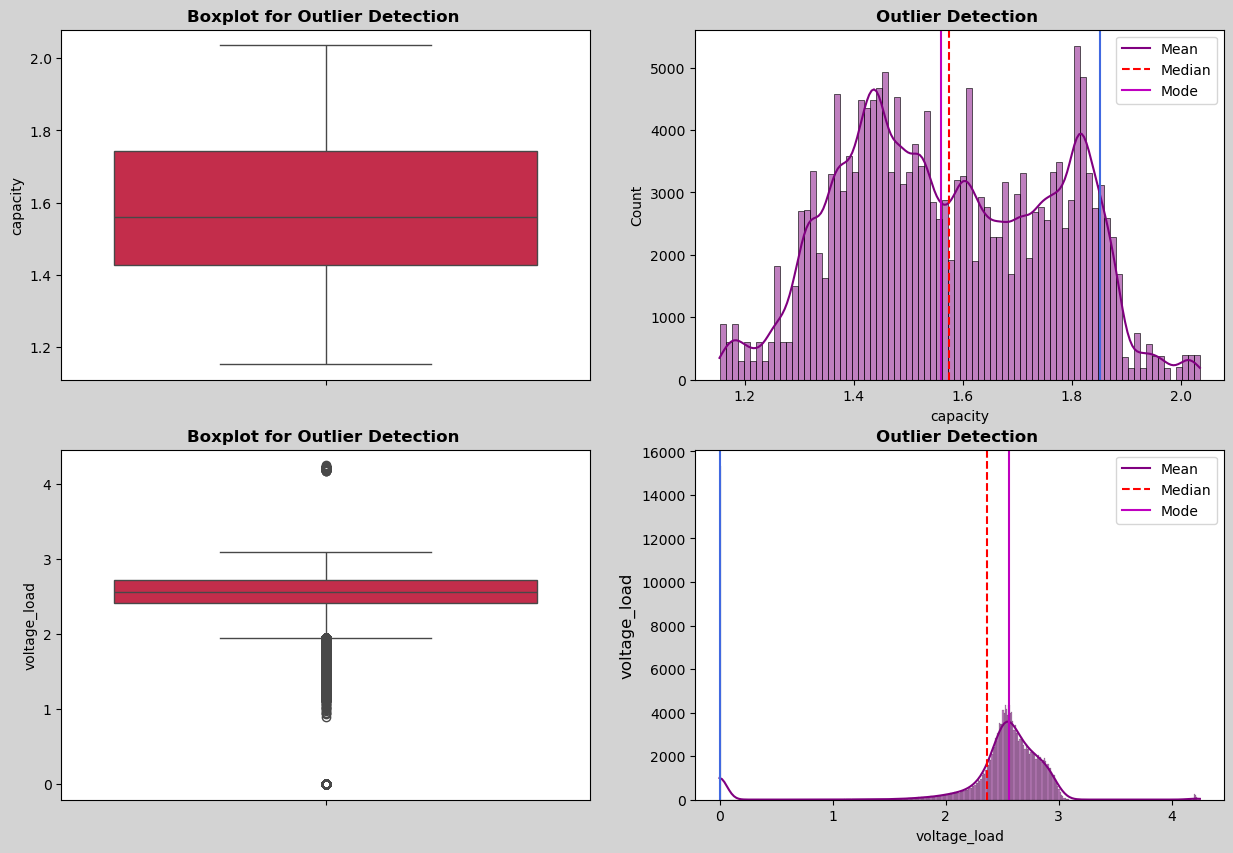

In [22]:
numerical_feat(fuel_cells_df,numerical_cols,len(numerical_cols),2,15,10)

- As we can see, the voltage load gas near normal distribution and has few outliers to the lower end.
- Whereas, capacity is multimodal distributed having almost zero outliers.

In [23]:
categorical_cols = ['flag']

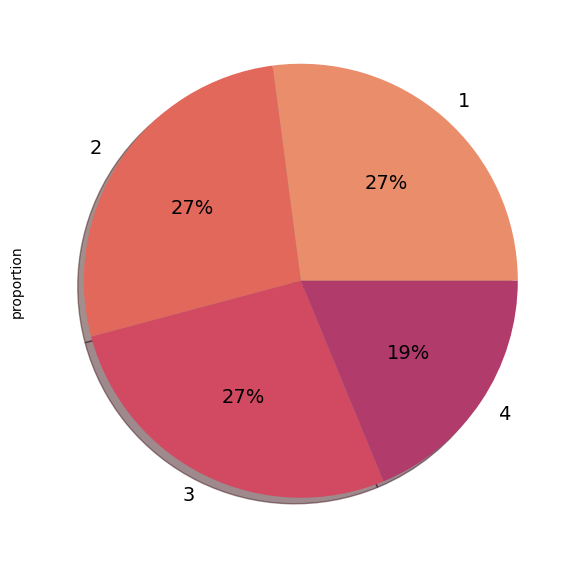

In [24]:
plt.figure(figsize = (7,8))
count = (fuel_cells_df['flag'].value_counts(normalize=True)*100)
count.plot.pie(colors = sns.color_palette("flare"),autopct='%0.0f%%',
                       textprops={'fontsize': 14},shadow = True)
plt.show()

- Battery 4 has least no. of datapoints, whereas the other three have equal no. of dp.

# Bivariate Analysis:

In [25]:
fuel_cells_df.columns

Index(['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag'],
      dtype='object')

### 1. Capacity w.r.t Cycle

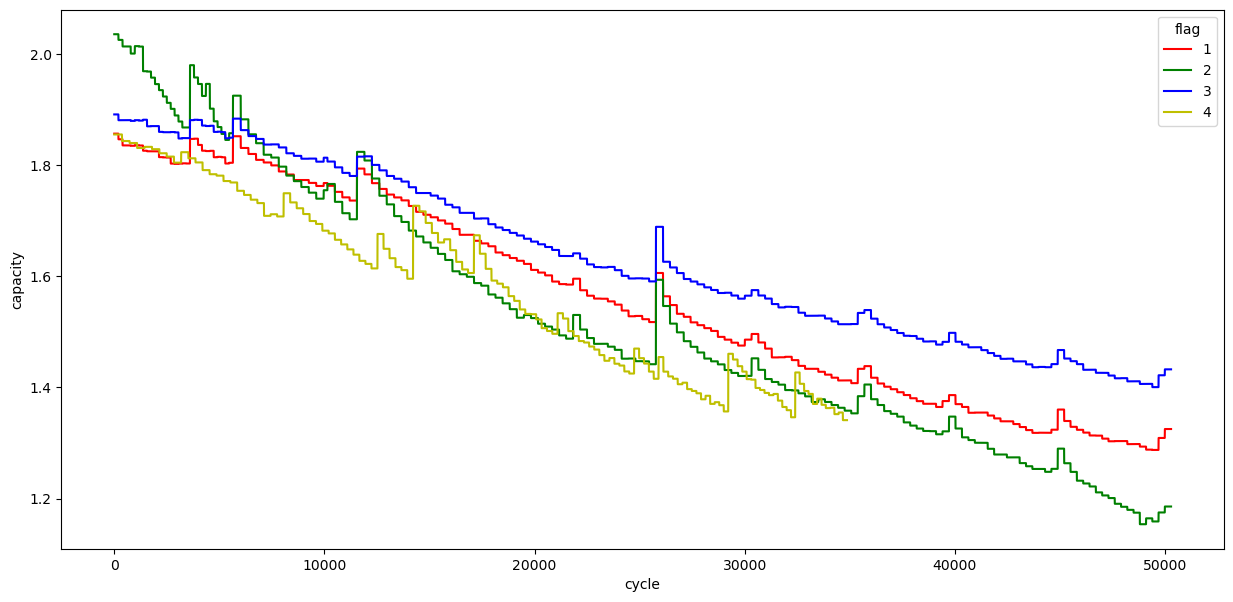

In [26]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'cycle', y = 'capacity', data = fuel_cells_df, palette = ['r','g','b','y'], hue = 'flag')
plt.show()

- Batteries:
    - B0005.mat Data for Fuel cell #5
    - B0006.mat Data for Fuel cell #6
    - B0007.mat Data for Fuel cell #7
    - B0018.mat Data for Fuel cell #18



- As the cycle increases, the batterry capacities is showing a decreasing trend.
- Capacity of batteries decrease as no. of cycles of battery usage increases
- Battery B0006 is having the largest capacity when it's new. Whereas B0018 and B0007 is having the least capacity when it's unused.
- Over a period of time, B0006 shows much more deteriorating trend than others , whereas B0007 has the most efficient capacity.

### 2. Datetime w.r.t time 

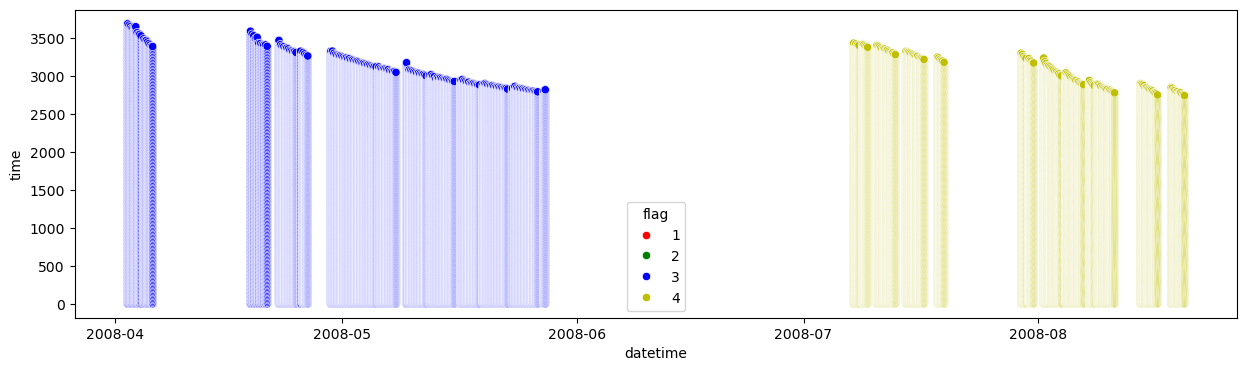

In [27]:
plt.figure(figsize=(15, 4))
sns.scatterplot(x = 'datetime', y = 'time', data = fuel_cells_df, palette = ['r','g','b','y'], hue = 'flag')
plt.show()

- There hasn't been a continuos testing og charging of batteries throught the cycle. 
- First three batteries (5,6,7) have been charged/tested synchronously whereas the 4th battery (B0018) is charges/tested post July 2008 with couple of breaks in between. 
- The gerenal trend is more or less the same which is as time of battery's cycle charging decreases over a period of time.

### 3.Datetime w.r.t capacity

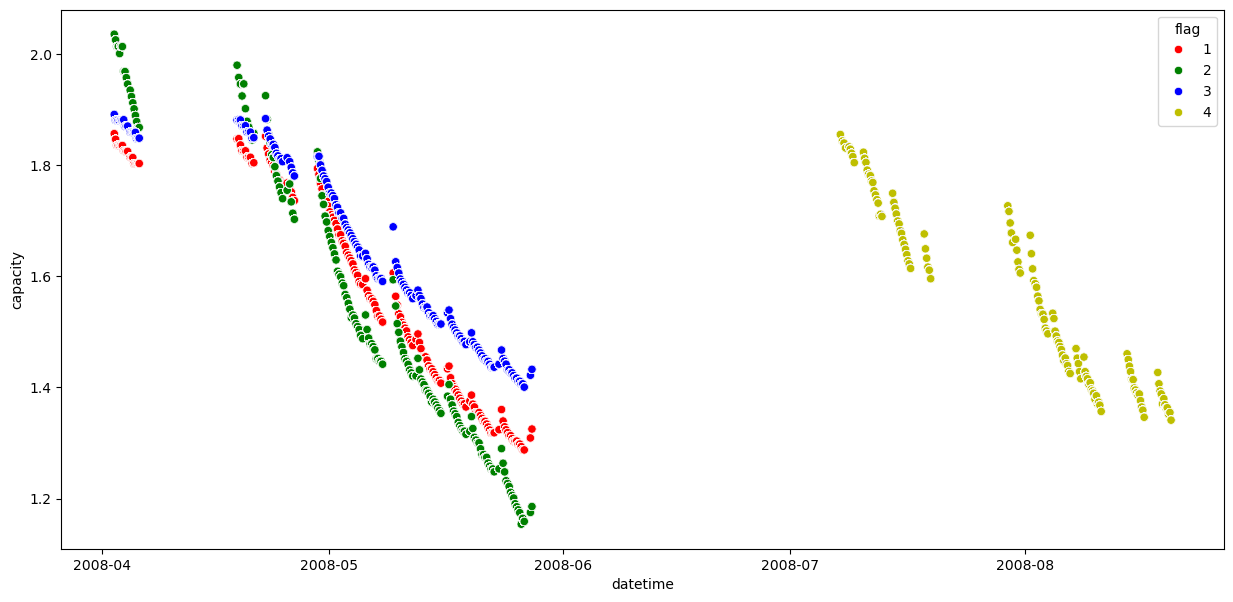

In [28]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x = 'datetime', y = 'capacity', data = fuel_cells_df, palette = ['r','g','b','y'], hue = 'flag')
plt.show()

- Capacity decreases over a period of time.
-  We can clearly see that, Battery (B0018) has been launched recently and is having average capacity over time.
- Capacity of Battery B0002 deteriorates the most over time whereas for blue it's most efficient in terms of capacity over a period of time.

### 4. Capacity w.r.t time

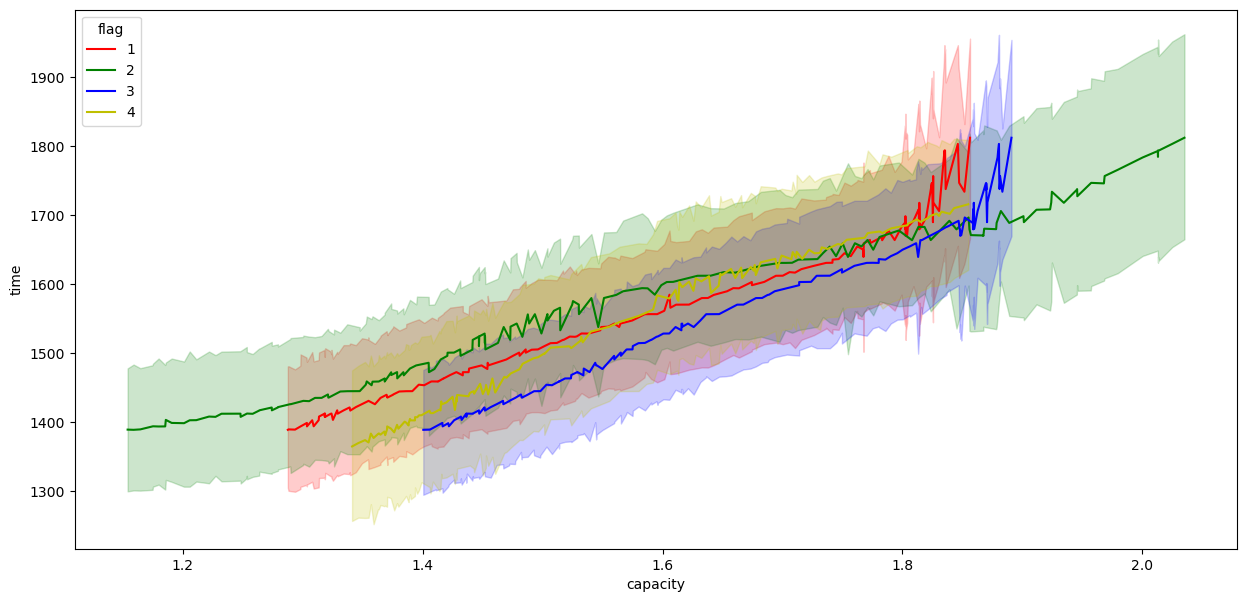

In [29]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'capacity', y = 'time', data = fuel_cells_df, palette = ['r','g','b','y'], hue = 'flag')
plt.show()

- As time to charge the batteries is increasing, the capacity is also increasing on an average for all four batteries

### 5. Temperature w.r.t time

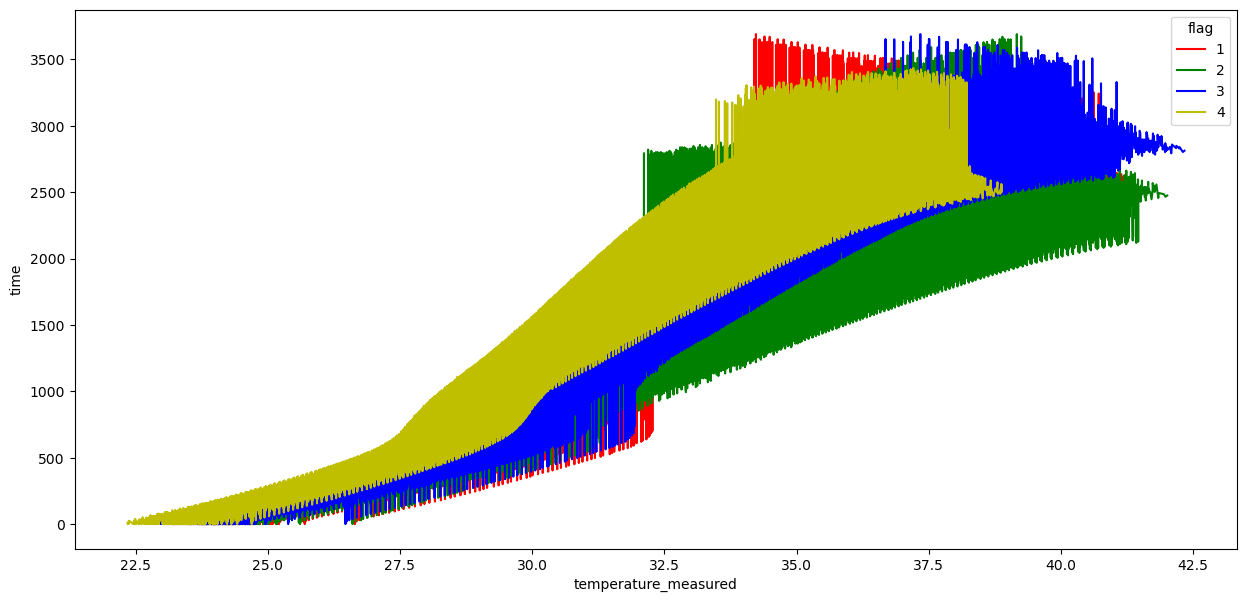

In [30]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'temperature_measured', y = 'time', data = fuel_cells_df, palette = ['r','g','b','y'], hue = 'flag')
plt.show()

-  As time increases for batteries, the depreciation increases because, temeperature_measured increases in every cycle of charging.
- As clearly visible, Batter (B0006) with flag 2 has max no. of outliers

### 6. Voltage measured w.r.t time

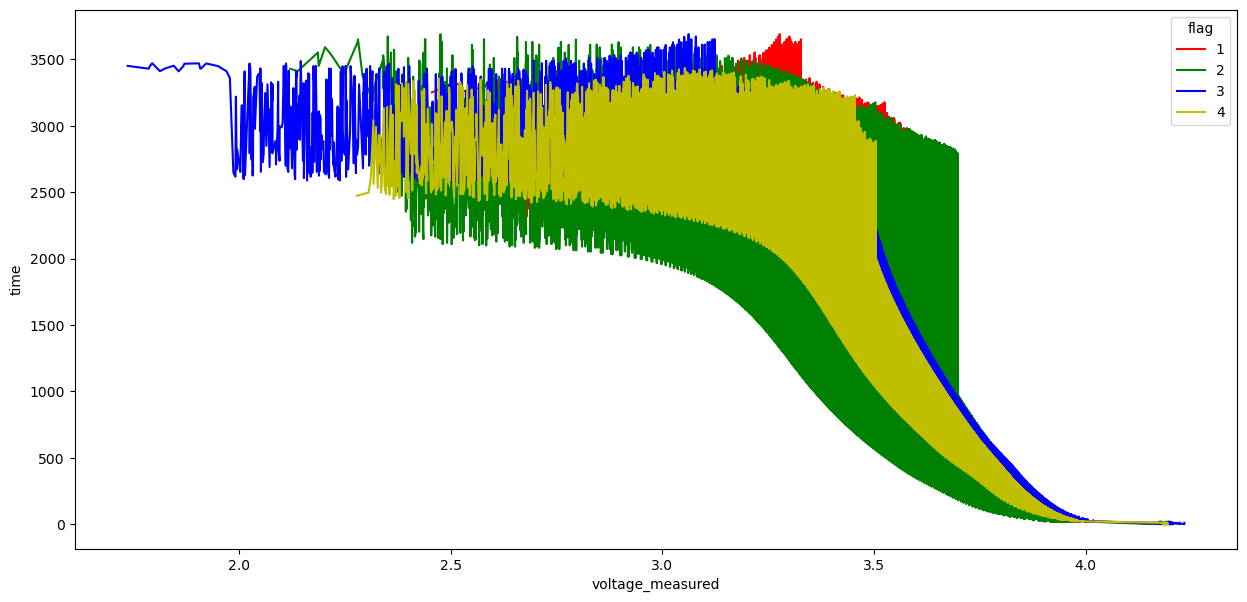

In [31]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'voltage_measured', y = 'time', data = fuel_cells_df, palette = ['r','g','b','y'], hue = 'flag')
plt.show()

- As clearly visible, Batter (B0006) with flag 2 has max no. of outliers

### 7. Current measured w.r.t time

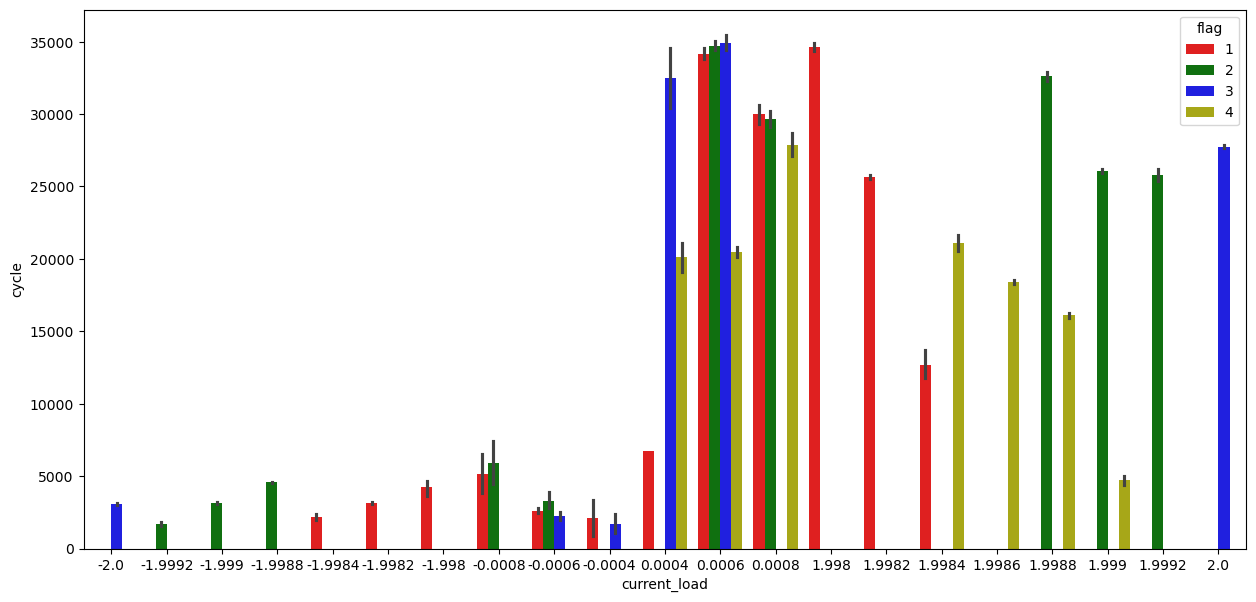

In [32]:
plt.figure(figsize=(15, 7))
sns.barplot(x = 'current_load', y = 'cycle', data = fuel_cells_df, palette = ['r','g','b','y'], hue = 'flag')
plt.show()

- As clearly visible, Batter (B0006) with flag 2 has max no. of outliers

### 8. Correlation between various features

<!-- ![image.png](attachment:image.png) -->

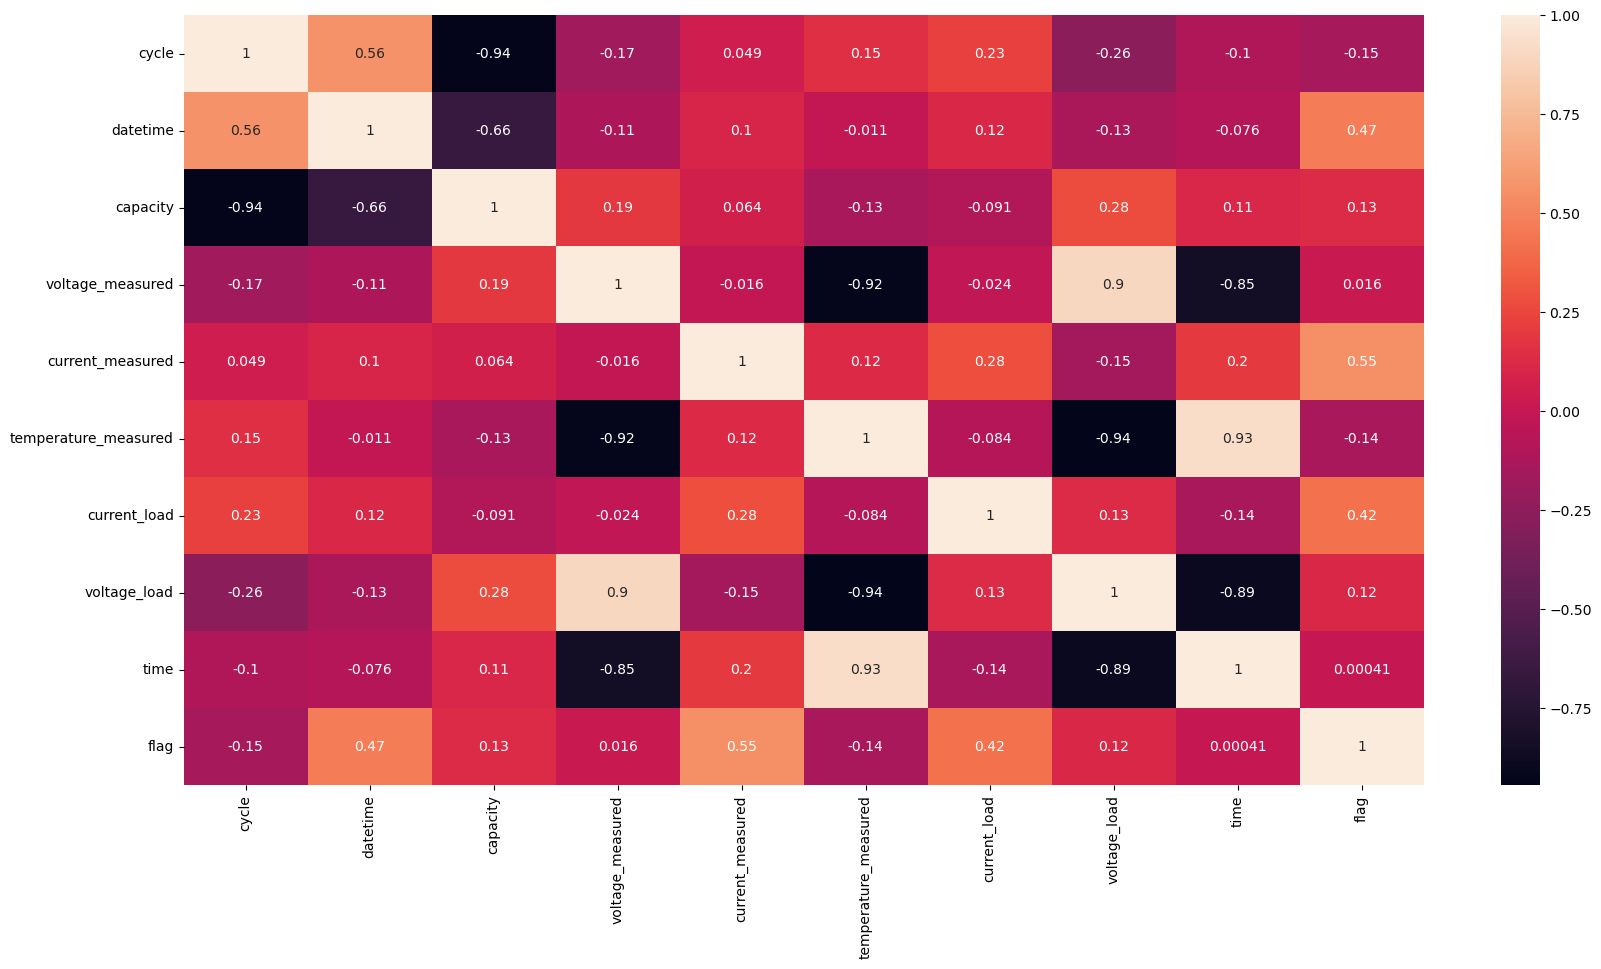

In [33]:
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(fuel_cells_df.corr(method = 'spearman'), annot = True)
plt.show()

- cycle & capacity -> negatively correlated.
- volatage load and voltage_measured -> negatively correlated.
- voltage_measured and time -> positively correlated.
- temperature and time -> positively correlated.

In [34]:
fuel_cells_df.shape

(185721, 10)

In [35]:
fuel_cells_df.drop_duplicates(keep = 'first', inplace = True)
fuel_cells_df.shape

(185721, 10)

In [36]:
fuel_cells_df.dropna(inplace = True)

In [37]:
fuel_cells_df.shape

(185721, 10)

In [38]:
fuel_cells_df.columns

Index(['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag'],
      dtype='object')

# Visual analysis using traditional methods of anomaly detection( IQR and DBSCAN )

# 1. IQR based anomaly detection

In [39]:
num_cols_1 = ['capacity', 'voltage_measured','voltage_load']

In [40]:
num_cols_2 = ['current_measured','current_load']
temp = ['temperature_measured']

In [41]:
num_cols_3 = ['cycle','time']

In [42]:
Q1 = fuel_cells_df.quantile(0.25)
Q3 = fuel_cells_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cycle                            23215.0
datetime                23 days 02:10:03
capacity                        0.315825
voltage_measured                0.278098
current_measured                0.021444
temperature_measured            5.850056
current_load                      0.0008
voltage_load                       0.308
time                            1542.688
flag                                 2.0
dtype: object


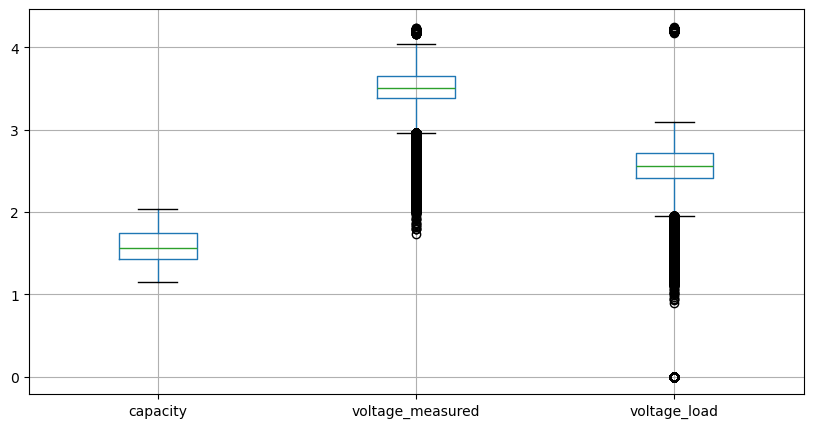

In [43]:
fuel_cells_df[num_cols_1].boxplot(figsize = (10,5))
plt.show()

#### - 'voltage_measured','voltage_load' have more no. of outliers (below the lower whisker)

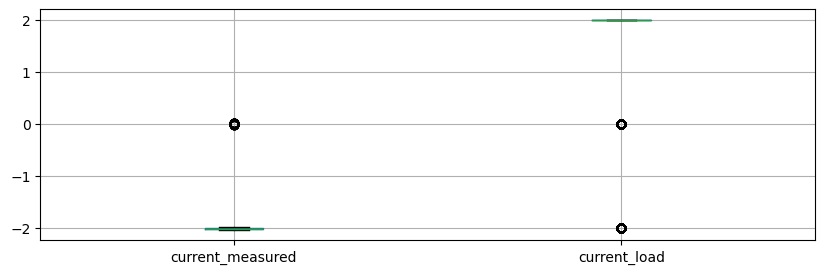

In [44]:
fuel_cells_df[num_cols_2].boxplot( figsize = (10,3))
plt.show()

#### - As the dataponts are less, the IQR range is very small, but some outliers are present for 'current_measured','current_load'

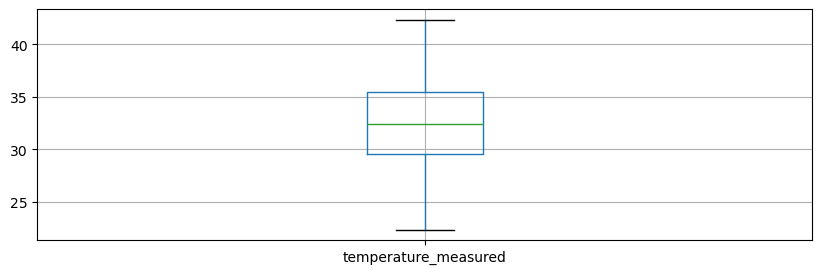

In [45]:
fuel_cells_df[temp].boxplot(figsize = (10,3))
plt.show()

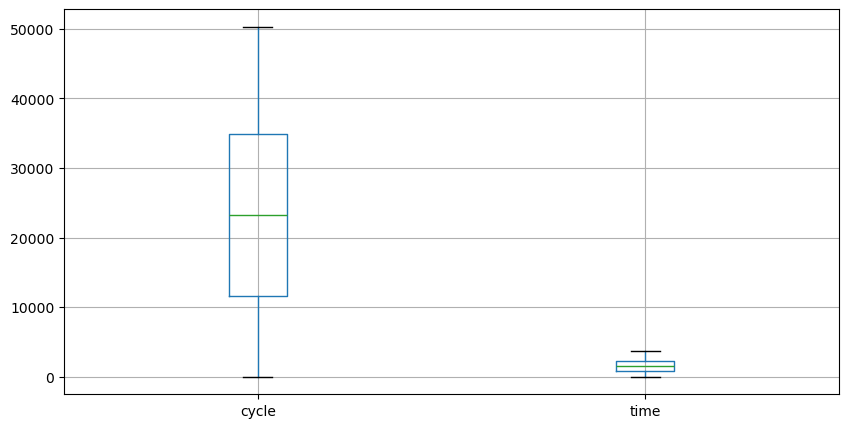

In [46]:
fuel_cells_df[num_cols_3].boxplot(figsize = (10,5))
plt.show()

- All other features are having very less outliers

In [47]:
num_cols = ['cycle','capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time']

In [48]:
fuel_cells_df.shape

(185721, 10)

In [49]:
fuel_cells_df1 = fuel_cells_df.copy()

### Outliers treatment using IQR based method

In [50]:
# fuel_cells_df1 = fuel_cells_df1[~((fuel_cells_df1[num_cols] < (Q1 - 1.5*IQR)) | (fuel_cells_df1[num_cols] > (Q3 +1.5*IQR))).any(axis = 1)]
# fuel_cells_df1 = fuel_cells_df1.reset_index(drop = True)

# 1. Select only the numeric columns first
df_numeric = fuel_cells_df1[num_cols]

# 2. Calculate bounds based on that specific selection
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# 3. Apply the filter (Pandas will now align the columns correctly)
mask = ~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
fuel_cells_df1 = fuel_cells_df1[mask].reset_index(drop=True)

In [51]:
fuel_cells_df1.shape

(147955, 10)

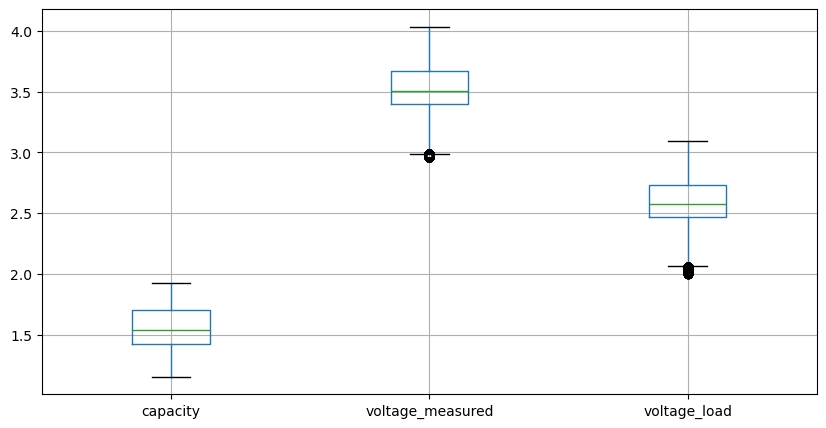

In [52]:
fuel_cells_df1[num_cols_1].boxplot(figsize = (10,5))
plt.show()

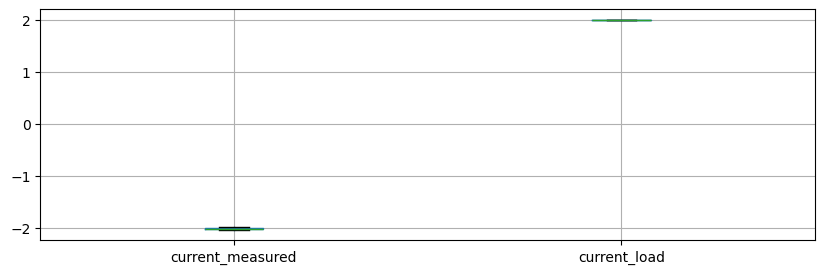

In [53]:
fuel_cells_df1[num_cols_2].boxplot(figsize = (10,3))
plt.show()

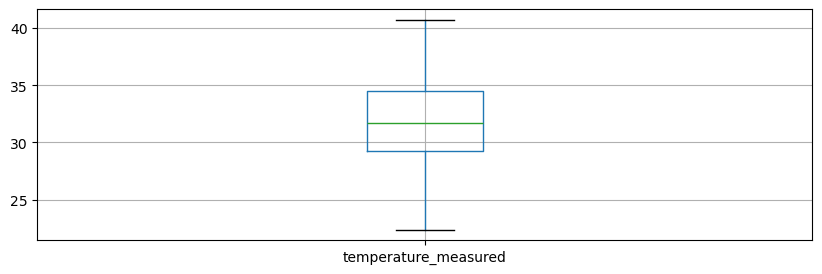

In [54]:
fuel_cells_df1[temp].boxplot(figsize = (10,3))
plt.show()

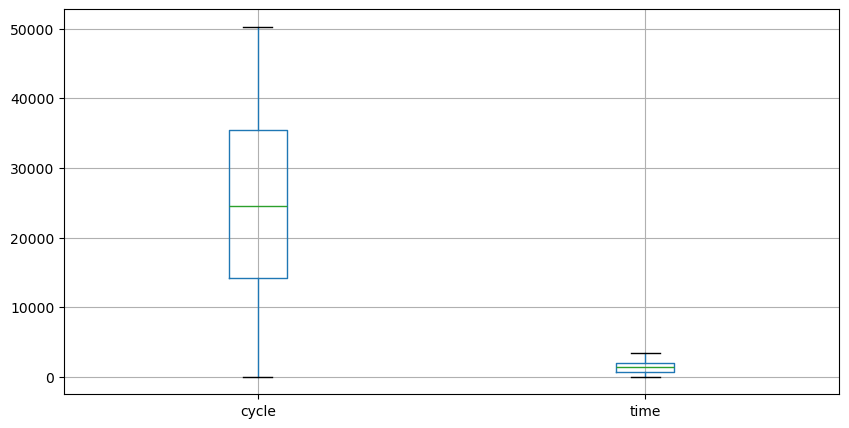

In [55]:
fuel_cells_df1[num_cols_3].boxplot(figsize = (10,5))
plt.show()

In [56]:
fuel_cells_df1.shape[0] - fuel_cells_df.shape[0]

-37766

-  total 37,766 datapoints are eliminated using IQR based method.
- This might contain some useful data as well, so it's better to treat/ detect outliers with some robust and SOTA methods of anomaly detection

In [57]:
# copy before mormalization and before datetime converson to int
fuel_cells_df_copy1 = fuel_cells_df.copy()

In [58]:
fuel_cells_df['datetime'] = fuel_cells_df['datetime'].astype('int64')
fuel_cells_df['datetime'].head()
# copy before mormalization and after datetime converson to int
fuel_cells_df_copy2 = fuel_cells_df.copy()

# 2. DBSCAN based anomaly detection

In [59]:
# DBSCAn on entire dataset

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

cols = ['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag']



std_scaler = StandardScaler().fit(fuel_cells_df_copy2)
std_df = std_scaler.transform(fuel_cells_df_copy2)

dbsc = DBSCAN(eps = .5, min_samples = 200).fit(std_df)


labels = dbsc.labels_

 


In [61]:
out_df = fuel_cells_df_copy2.copy()
out_df['label'] = dbsc.labels_

In [62]:
out_df['label'].value_counts()

label
 7     41652
 1     39197
 4     37765
 9     31177
-1      8009
 6      5394
 3      5292
 0      5209
 5      4825
 2      4202
 10     1991
 8      1008
Name: count, dtype: int64

In [63]:
count_df = pd.DataFrame(data = out_df['label'].value_counts().values, columns = ['label_counts'])
count_df

label_counts
0          41652
1          39197
2          37765
3          31177
4           8009
5           5394
6           5292
7           5209
8           4825
9           4202
10          1991
11          1008

In [64]:
index_df = pd.DataFrame(data = out_df['label'].value_counts().index, columns = ['label_index'])
index_df

Empty DataFrame
Columns: [label_index]
Index: []

In [65]:
label_counts_df = pd.concat([index_df,count_df], axis = 1)
label_counts_df

label_index  label_counts
0          NaN         41652
1          NaN         39197
2          NaN         37765
3          NaN         31177
4          NaN          8009
5          NaN          5394
6          NaN          5292
7          NaN          5209
8          NaN          4825
9          NaN          4202
10         NaN          1991
11         NaN          1008

In [66]:
out_df

cycle             datetime  capacity  voltage_measured  \
0           1  1207149941000000000  1.856487          4.191492   
1           2  1207149941000000000  1.856487          4.190749   
2           3  1207149941000000000  1.856487          3.974871   
3           4  1207149941000000000  1.856487          3.951717   
4           5  1207149941000000000  1.856487          3.934352   
...       ...                  ...       ...               ...   
185716  34862  1219221439000000000  1.341051          3.443760   
185717  34863  1219221439000000000  1.341051          3.453271   
185718  34864  1219221439000000000  1.341051          3.461963   
185719  34865  1219221439000000000  1.341051          3.469907   
185720  34866  1219221439000000000  1.341051          3.477277   

        current_measured  temperature_measured  current_load  voltage_load  \
0              -0.004902             24.330034       -0.0006         0.000   
1              -0.001478             24.325993       -0.0006         4.206   
2              -2.012528             24.389085       -1.9982         3.062   
3              -2.013979             24.544752       -1.9982         3.030   
4              -2.011144             24.731385       -1.9982         3.011   
...                  ...                   ...           ...           ...   
185716         -0.002426             35.383979        0.0006         0.000   
185717         -0.000981             35.179732        0.0006         0.000   
185718          0.000209             34.977000        0.0006         0.000   
185719          0.001516             34.785943        0.0006         0.000   
185720         -0.001940             34.581660        0.0006         0.000   

            time  flag  label  
0          0.000     1     -1  
1         16.781     1     -1  
2         35.703     1      0  
3         53.781     1      0  
4         71.922     1      0  
...          ...   ...    ...  
185716  2686.359     4     10  
185717  2700.546     4     10  
185718  2714.640     4     10  
185719  2728.750     4     10  
185720  2742.843     4     10  

[185721 rows x 11 columns]

### Visualization in lower dimention ( 2 features)

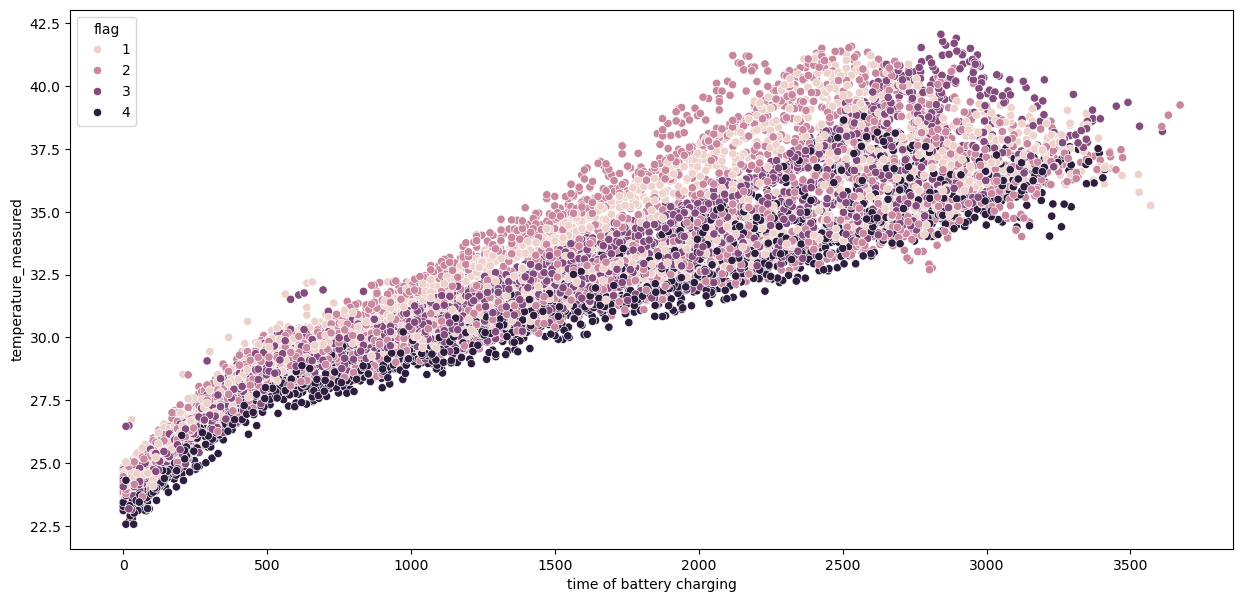

In [ ]:

plt.figure(figsize=(15, 7))
sns.scatterplot(x = 'time', y = 'temperature_measured', hue ='flag', data = out_df.sample(n = 10000, replace = True))
plt.xlabel('time of battery charging')
plt.ylabel('temperature_measured')
plt.show()

-  We can hardly see any outliers present when visualized with these two features.
- Lets cross check with some other two features

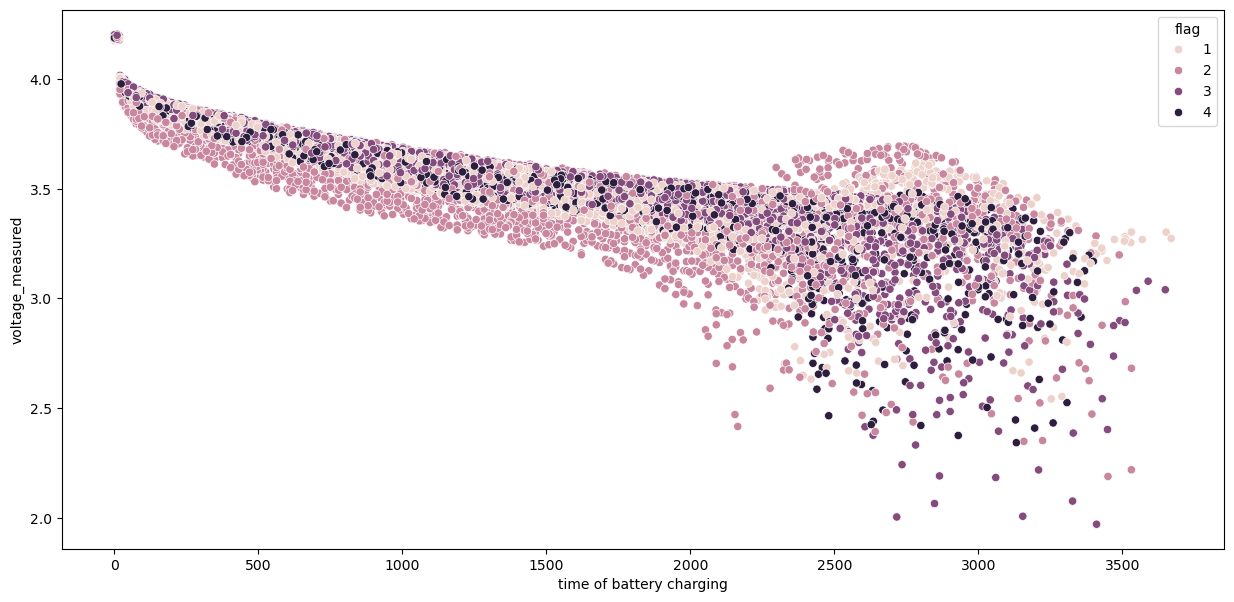

In [69]:
# Let's plot different two features data now for viz
plt.figure(figsize=(15, 7))
sns.scatterplot(x = 'time', y = 'voltage_measured', hue ='flag', data = out_df.sample(n = 10000, replace = True))
plt.xlabel('time of battery charging')
plt.ylabel('voltage_measured')
plt.show()

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics


df = fuel_cells_df_copy2[['time','voltage_measured']].sample(n = 10000, replace = True)

std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

dbsc = DBSCAN(eps = .5, min_samples = 200).fit(std_df)


labels = dbsc.labels_

In [71]:
out_df = df.copy()
out_df['label'] = dbsc.labels_

In [72]:
out_df['label'].value_counts()

label
 0    9794
-1     206
Name: count, dtype: int64

In [73]:
out_df

time  voltage_measured  label
18736   2427.093          3.390445      0
37732   1602.719          3.419106      0
1141    3073.875          3.299036      0
160122  3028.640          2.990336      0
26582   1331.047          3.530478      0
...          ...               ...    ...
130121  1780.906          3.467817      0
57505   1059.515          3.637935      0
69610   1612.063          3.420167      0
25643   1836.687          3.438894      0
60392   2664.719          3.365828      0

[10000 rows x 3 columns]

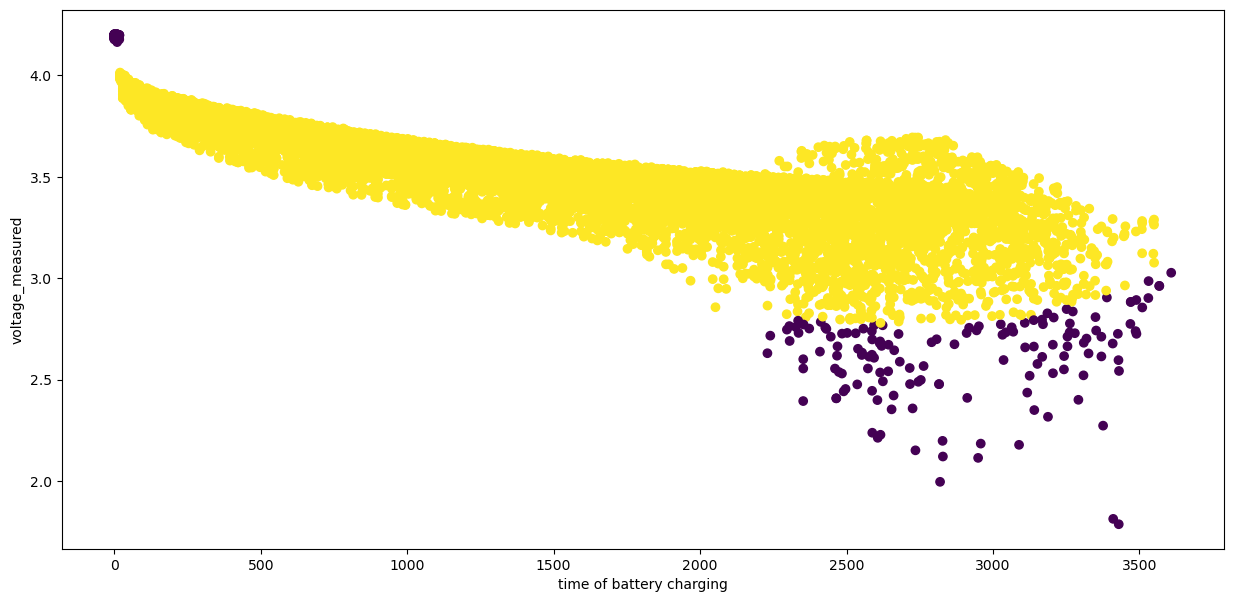

In [74]:
plt.figure(figsize=(15, 7))
plt.scatter(out_df['time'], out_df['voltage_measured'], c=out_df['label'])
plt.xlabel('time of battery charging')
plt.ylabel('voltage_measured')
plt.show()

- With DBSCAn, we are clearly able to see the cluster for noise points in purple.

#### - The total no. of outliers are 8009

In [75]:
fuel_cells_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185721 entries, 0 to 185720
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cycle                 185721 non-null  int64  
 1   datetime              185721 non-null  int64  
 2   capacity              185721 non-null  float64
 3   voltage_measured      185721 non-null  float64
 4   current_measured      185721 non-null  float64
 5   temperature_measured  185721 non-null  float64
 6   current_load          185721 non-null  float64
 7   voltage_load          185721 non-null  float64
 8   time                  185721 non-null  float64
 9   flag                  185721 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 14.2 MB


### Minmax Scaling of orginal data:

In [76]:

cols = ['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag']
mm_scaler = MinMaxScaler()

fuel_cells_df[cols] = mm_scaler.fit_transform(fuel_cells_df[cols])
fuel_cells_df.head()

cycle  datetime  capacity  voltage_measured  current_measured  \
0  0.00000       0.0  0.797111          0.983242          0.990600   
1  0.00002       0.0  0.797111          0.982944          0.992276   
2  0.00004       0.0  0.797111          0.896465          0.008109   
3  0.00006       0.0  0.797111          0.887189          0.007399   
4  0.00008       0.0  0.797111          0.880233          0.008787   

   temperature_measured  current_load  voltage_load      time  flag  
0              0.099077       0.49985      0.000000  0.000000   0.0  
1              0.098875       0.49985      0.989880  0.004547   0.0  
2              0.102032       0.00045      0.720640  0.009675   0.0  
3              0.109822       0.00045      0.713109  0.014574   0.0  
4              0.119162       0.00045      0.708637  0.019490   0.0

# 3. Isolation Forest based Anomaly detection

The individual trees in an Isolation forest pick up a random feature and a random threshold and splits the data based on that. We expect the outliers to be found out at lower depth than normal points.

In [77]:
fuel_cells_df['flag'].unique()

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [235]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# flag_df = pd.DataFrame()
# flag_df_final = pd.DataFrame()
# for j in fuel_cells_df['flag'].unique():
#     contamination_arr = [0.01, 0.02, 0.03, 0.04]
#     flag_df = fuel_cells_df[fuel_cells_df['flag'] == j]
#     for i in contamination_arr:
#         model = IsolationForest(n_estimators = 200, max_samples = 'auto', contamination = i, random_state = 42)
#         flag_df['anomaly_score'+'_'+str(i)] = model.fit_predict(flag_df)
#         flag_df['scores'+'_'+str(i)] = model.decision_function(flag_df[flag_df.columns.difference(['anomaly_score'+'_'+str(i)])])
#     flag_df_final = pd.concat([flag_df,flag_df_final])


# 1. Define the features you actually want to train on (exclude 'flag', etc.)
# Explicitly keep only non-redundant, meaningful numeric features
features = [
    'cycle',
    'capacity',
    'voltage_measured',
    'current_measured',
    'temperature_measured',
    'current_load'
]

flag_df_final = pd.DataFrame()

for j in fuel_cells_df['flag'].unique():
    contamination_arr = [0.01, 0.02, 0.03, 0.04]
    # Use .copy() to avoid SettingWithCopy warnings
    flag_df = fuel_cells_df[fuel_cells_df['flag'] == j].copy()
    
    for i in contamination_arr:
        model = IsolationForest(
            n_estimators=200,
            max_samples='auto',
            contamination=i,
            random_state=42
        )
        
        # Fit and predict ONLY on the predefined features
        flag_df['anomaly_score_' + str(i)] = model.fit_predict(flag_df[features])
        
        # Decision function ONLY on the same features
        flag_df['scores_' + str(i)] = model.decision_function(flag_df[features])
        
    flag_df_final = pd.concat([flag_df, flag_df_final])


In [236]:
flag_df_final['anomaly_score_0.01'].value_counts(ascending= True)

anomaly_score_0.01
-1      1858
 1    183863
Name: count, dtype: int64

In [237]:
for i in contamination_arr:
    print(f'Anomalies with contamination {i}:',len(flag_df_final[flag_df_final['anomaly_score'+'_'+str(i)] == -1]))

Anomalies with contamination 0.01: 1858
Anomalies with contamination 0.02: 3716
Anomalies with contamination 0.03: 5573
Anomalies with contamination 0.04: 7431


<!-- ![image.png](attachment:image.png) -->

In [238]:
## Data before normalization merging with new:

fuel_cells_df_final = pd.concat([fuel_cells_df_copy2, flag_df_final.drop(columns=fuel_cells_df.columns)], axis = 1)

In [239]:
df_final_copy = fuel_cells_df_final.copy()

In [240]:
fuel_cells_df_final

cycle             datetime  capacity  voltage_measured  \
0           1  1207149941000000000  1.856487          4.191492   
1           2  1207149941000000000  1.856487          4.190749   
2           3  1207149941000000000  1.856487          3.974871   
3           4  1207149941000000000  1.856487          3.951717   
4           5  1207149941000000000  1.856487          3.934352   
...       ...                  ...       ...               ...   
185716  34862  1219221439000000000  1.341051          3.443760   
185717  34863  1219221439000000000  1.341051          3.453271   
185718  34864  1219221439000000000  1.341051          3.461963   
185719  34865  1219221439000000000  1.341051          3.469907   
185720  34866  1219221439000000000  1.341051          3.477277   

        current_measured  temperature_measured  current_load  voltage_load  \
0              -0.004902             24.330034       -0.0006         0.000   
1              -0.001478             24.325993       -0.0006         4.206   
2              -2.012528             24.389085       -1.9982         3.062   
3              -2.013979             24.544752       -1.9982         3.030   
4              -2.011144             24.731385       -1.9982         3.011   
...                  ...                   ...           ...           ...   
185716         -0.002426             35.383979        0.0006         0.000   
185717         -0.000981             35.179732        0.0006         0.000   
185718          0.000209             34.977000        0.0006         0.000   
185719          0.001516             34.785943        0.0006         0.000   
185720         -0.001940             34.581660        0.0006         0.000   

            time  flag  anomaly_score_0.01  scores_0.01  anomaly_score_0.02  \
0          0.000     1                  -1    -0.064631                  -1   
1         16.781     1                  -1    -0.061412                  -1   
2         35.703     1                   1     0.002518                  -1   
3         53.781     1                  -1    -0.000323                  -1   
4         71.922     1                   1     0.007467                  -1   
...          ...   ...                 ...          ...                 ...   
185716  2686.359     4                   1     0.013891                  -1   
185717  2700.546     4                   1     0.020016                  -1   
185718  2714.640     4                   1     0.021106                  -1   
185719  2728.750     4                   1     0.014255                  -1   
185720  2742.843     4                   1     0.010456                  -1   

        scores_0.02  anomaly_score_0.03  scores_0.03  anomaly_score_0.04  \
0         -0.085248                  -1    -0.099865                  -1   
1         -0.082029                  -1    -0.096646                  -1   
2         -0.018099                  -1    -0.032716                  -1   
3         -0.020940                  -1    -0.035557                  -1   
4         -0.013150                  -1    -0.027767                  -1   
...             ...                 ...          ...                 ...   
185716    -0.014719                  -1    -0.028831                  -1   
185717    -0.008594                  -1    -0.022706                  -1   
185718    -0.007505                  -1    -0.021617                  -1   
185719    -0.014356                  -1    -0.028468                  -1   
185720    -0.018155                  -1    -0.032267                  -1   

        scores_0.04  
0         -0.109778  
1         -0.106559  
2         -0.042629  
3         -0.045470  
4         -0.037680  
...             ...  
185716    -0.038111  
185717    -0.031986  
185718    -0.030896  
185719    -0.037747  
185720    -0.041546  

[185721 rows x 18 columns]

## Plotting scores to visualize the scores given to the data

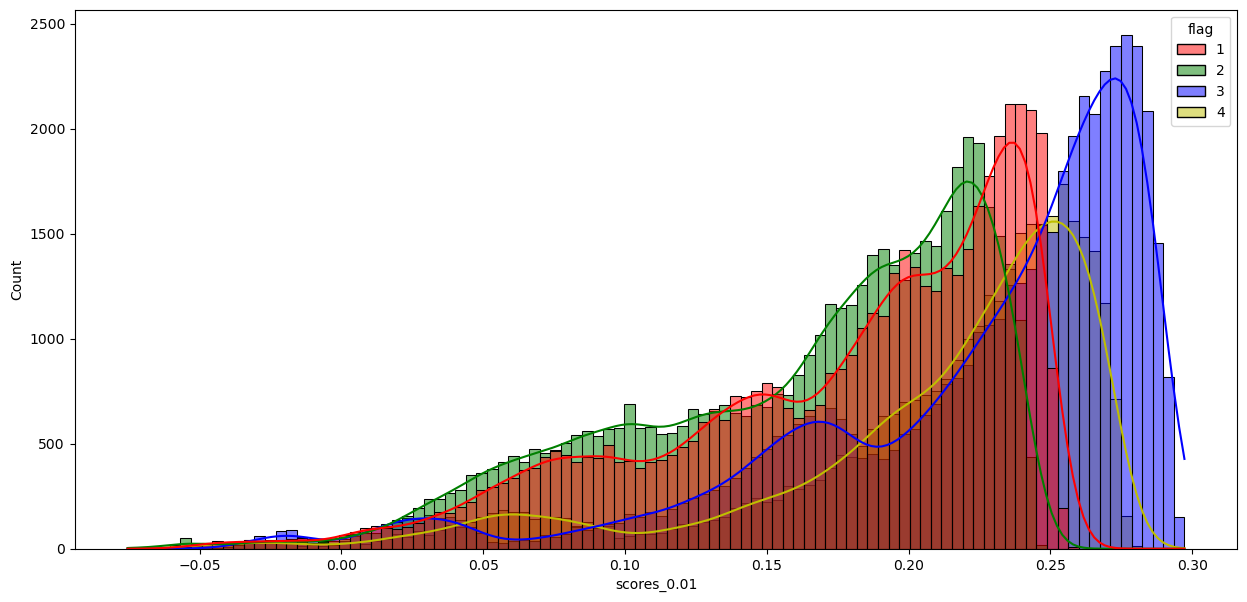

In [241]:
plt.figure(figsize=(15, 7))
sns.histplot(x = 'scores_0.01',hue = 'flag', palette=['r','g','b','y'], data = df_final_copy, bins = 100, kde = True)
fig.show()

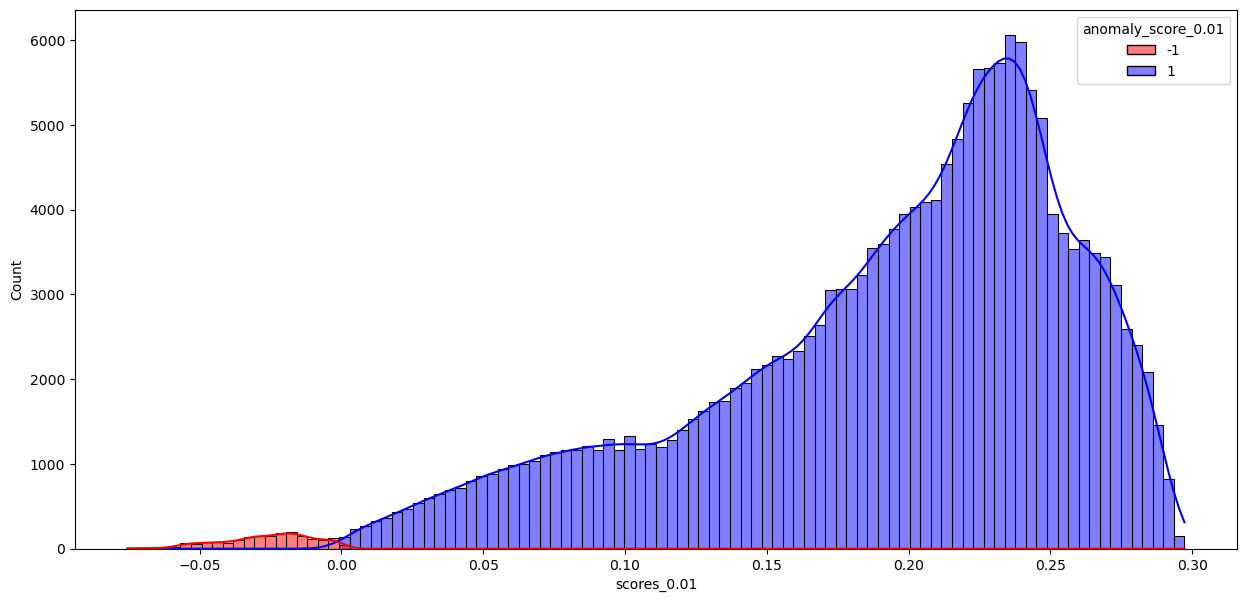

In [242]:
plt.figure(figsize=(15, 7))
sns.histplot(x = 'scores_0.01',hue = 'anomaly_score_0.01', palette=['r','b'], data = df_final_copy, bins = 100, kde = True)
fig.show()

In [243]:
df_final_copy[df_final_copy['anomaly_score_0.01']==-1]['flag'].value_counts()

flag
1    503
2    503
3    503
4    349
Name: count, dtype: int64

In [244]:
df_final_copy[df_final_copy['anomaly_score_0.04']==-1]['flag'].value_counts()

flag
1    2012
2    2012
3    2012
4    1395
Name: count, dtype: int64

In [245]:
data = df_final_copy[df_final_copy['anomaly_score_0.01']==-1]

In [246]:
wd = df_final_copy.loc[(df_final_copy['anomaly_score_0.01'] == -1) & (df_final_copy['flag'] == 2)]
len(wd)

503

In [247]:
# Thresholding on scores ( < 0.04)

wd2 = df_final_copy.loc[(df_final_copy['anomaly_score_0.01'] == -1) & (df_final_copy['flag'] == 2) & (df_final_copy['scores_0.01']<-0.04)]
len(wd2)

161

In [248]:
# Thresholding on scores ( < 0.05)

wd3 = df_final_copy.loc[(df_final_copy['anomaly_score_0.01'] == -1) & (df_final_copy['flag'] == 2) & (df_final_copy['scores_0.01']<-0.05)]
len(wd3)

111

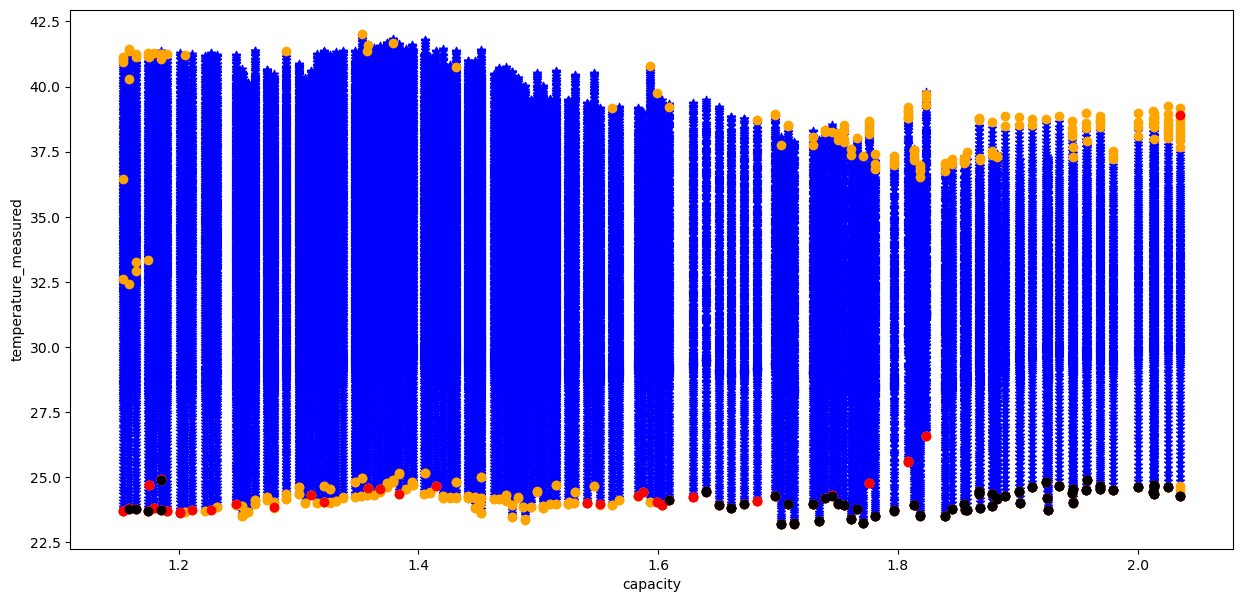

In [249]:
plt.figure(figsize=(15, 7))
plt.scatter(df_final_copy[(df_final_copy['anomaly_score_0.01'] == 1) & (df_final_copy['flag'] == 2)]['capacity'],
           df_final_copy[(df_final_copy['anomaly_score_0.01'] == 1) & (df_final_copy['flag'] == 2)]['temperature_measured'], c = 'blue', marker = "*")

plt.scatter(wd['capacity'], wd['temperature_measured'], c = 'orange', marker = 'o')
plt.scatter(wd2['capacity'], wd2['temperature_measured'], c = 'red', marker = 'o')
plt.scatter(wd3['capacity'], wd3['temperature_measured'], c = 'black', marker = 'o')

plt.xlabel('capacity')
plt.ylabel('temperature_measured')
plt.show()

- Batteries with much higher capacities and much lower capacities but having minimum temperature measured are having most critical number of outliers
- WHereas as the batteries with least temperature measured are having more number of outliers.

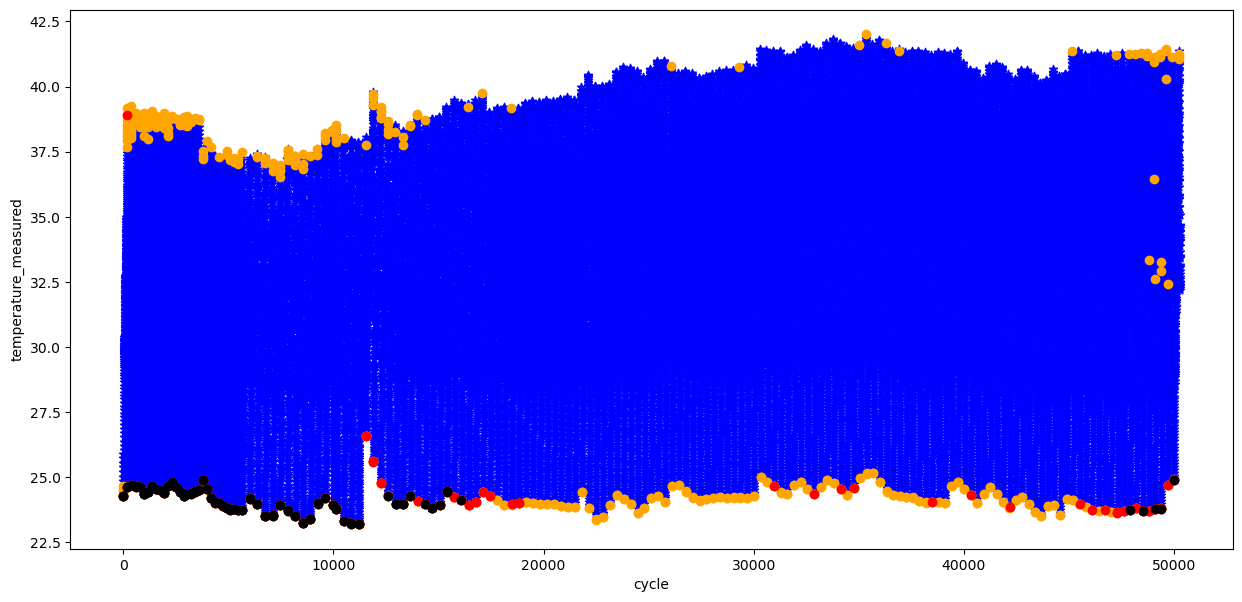

In [250]:
plt.figure(figsize=(15, 7))
plt.scatter(df_final_copy[(df_final_copy['anomaly_score_0.01'] == 1) & (df_final_copy['flag'] == 2)]['cycle'],
           df_final_copy[(df_final_copy['anomaly_score_0.01'] == 1) & (df_final_copy['flag'] == 2)]['temperature_measured'], c = 'blue', marker = "*")

plt.scatter(wd['cycle'], wd['temperature_measured'], c = 'orange', marker = 'o')
plt.scatter(wd2['cycle'], wd2['temperature_measured'], c = 'red', marker = 'o')
plt.scatter(wd3['cycle'], wd3['temperature_measured'], c = 'black', marker = 'o')

plt.xlabel('cycle')
plt.ylabel('temperature_measured')
plt.show()

- The batteries with least temperature measured are having more number of outliers.

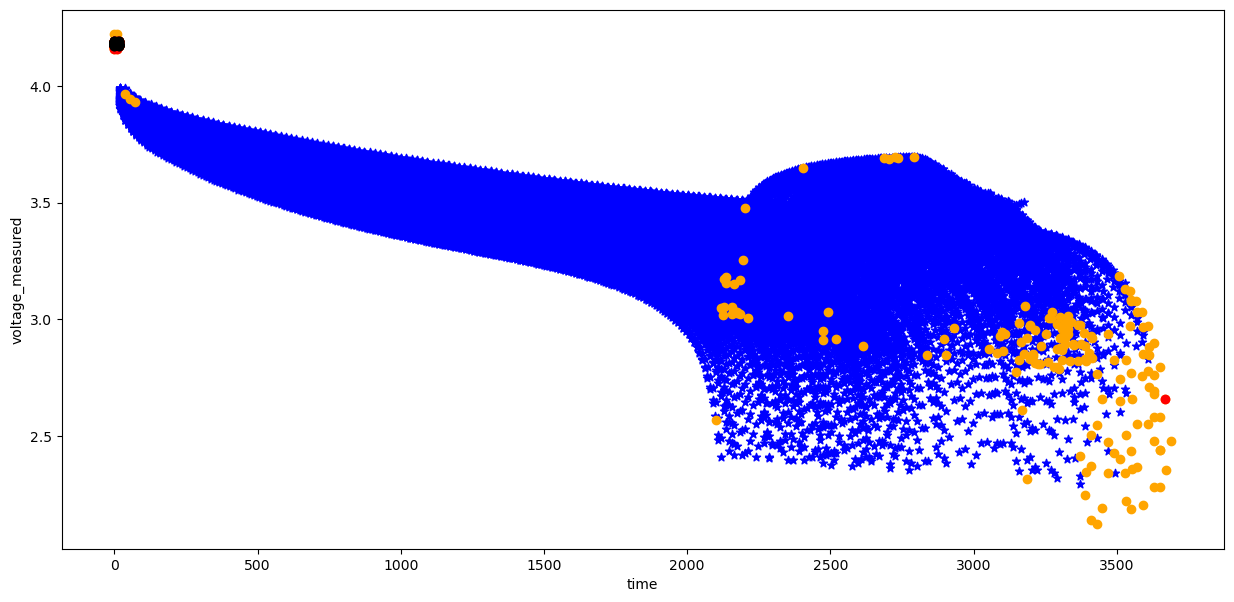

In [251]:
plt.figure(figsize=(15, 7))
plt.scatter(df_final_copy[(df_final_copy['anomaly_score_0.01'] == 1) & (df_final_copy['flag'] == 2)]['time'],
           df_final_copy[(df_final_copy['anomaly_score_0.01'] == 1) & (df_final_copy['flag'] == 2)]['voltage_measured'], c = 'blue', marker = "*")

plt.scatter(wd['time'], wd['voltage_measured'], c = 'orange', marker = 'o')
plt.scatter(wd2['time'], wd2['voltage_measured'], c = 'red', marker = 'o')
plt.scatter(wd3['time'], wd3['voltage_measured'], c = 'black', marker = 'o')

plt.xlabel('time')
plt.ylabel('voltage_measured')
plt.show()

- Batteries datapoints which are producing maximum voltages with barely minimum charging time are ceratinly outliers/anamolies.
- Also, with least contamination, the Batteries datapoints which requires maximum time to charge ceratinly outliers/anamolies.

### Anamolies with increased contamination %

In [252]:
# Testing with multiple values such as with  anomaly_score_0.04

wd = df_final_copy.loc[(df_final_copy['anomaly_score_0.04'] == -1) & (df_final_copy['flag'] == 2)]
wd2 = df_final_copy.loc[(df_final_copy['anomaly_score_0.04'] == -1) & (df_final_copy['flag'] == 2) & (df_final_copy['scores_0.04']<-0.04)]
wd3 = df_final_copy.loc[(df_final_copy['anomaly_score_0.04'] == -1) & (df_final_copy['flag'] == 2) & (df_final_copy['scores_0.04']<-0.05)]
        

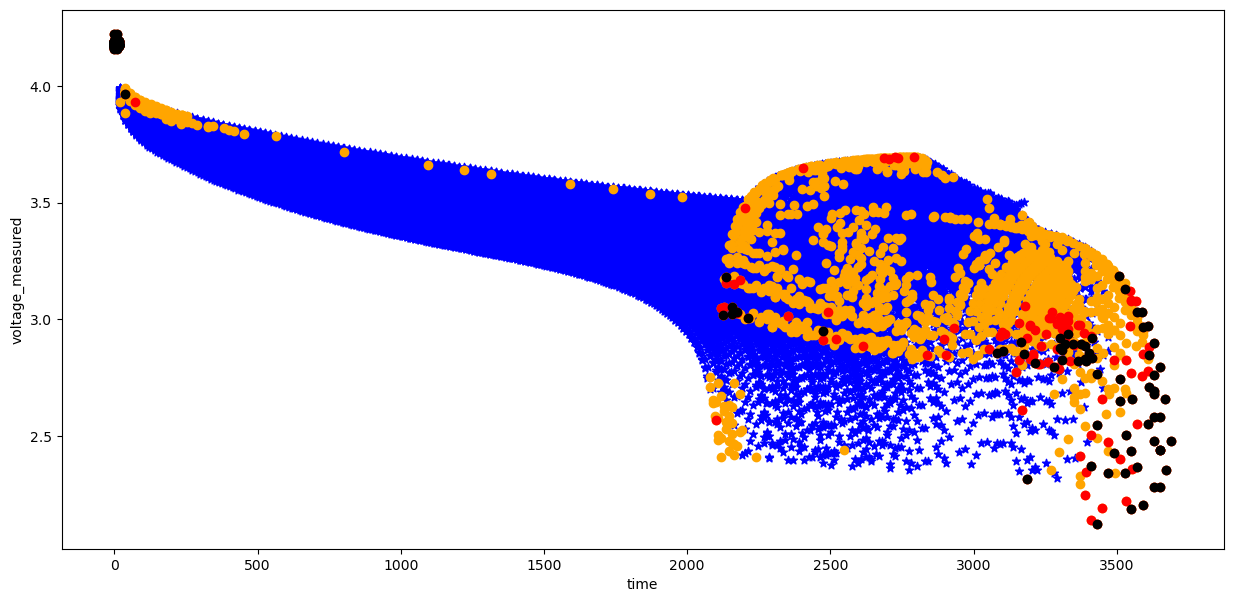

In [253]:
plt.figure(figsize=(15, 7))
plt.scatter(df_final_copy[(df_final_copy['anomaly_score_0.04'] == 1) & (df_final_copy['flag'] == 2)]['time'],
           df_final_copy[(df_final_copy['anomaly_score_0.04'] == 1) & (df_final_copy['flag'] == 2)]['voltage_measured'], c = 'blue', marker = "*")

plt.scatter(wd['time'], wd['voltage_measured'], c = 'orange', marker = 'o')
plt.scatter(wd2['time'], wd2['voltage_measured'], c = 'red', marker = 'o')
plt.scatter(wd3['time'], wd3['voltage_measured'], c = 'black', marker = 'o')

plt.xlabel('time')
plt.ylabel('voltage_measured')
plt.show()

- As it's clearly visible , if we increase the contamination % of outliers to 4 % , it's able to classify the visually seen anamolies as outliers as compared to contamionation of 1 %
- Also, with max contamination of 4%, the Batteries datapoints which requires maximum time to charge and whose voltages are low are ceratinly outliers/anamolies.

In [254]:
flags_arr = [1,2,3,4]
contamination_arr = [0.01,0.02,0.03,0.04]

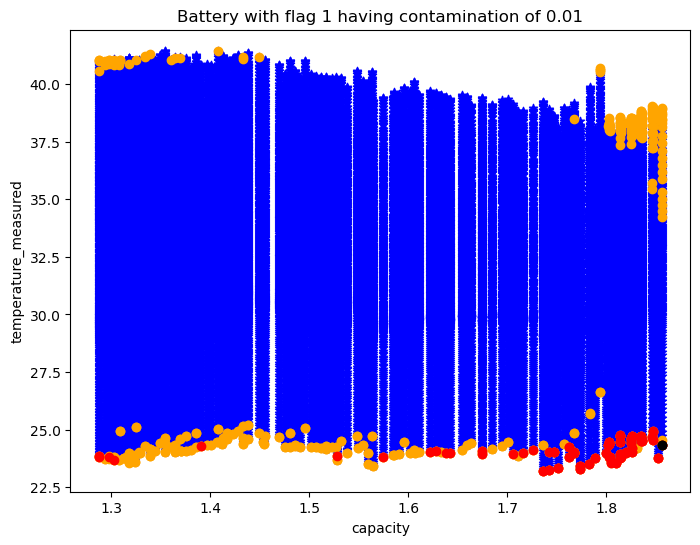

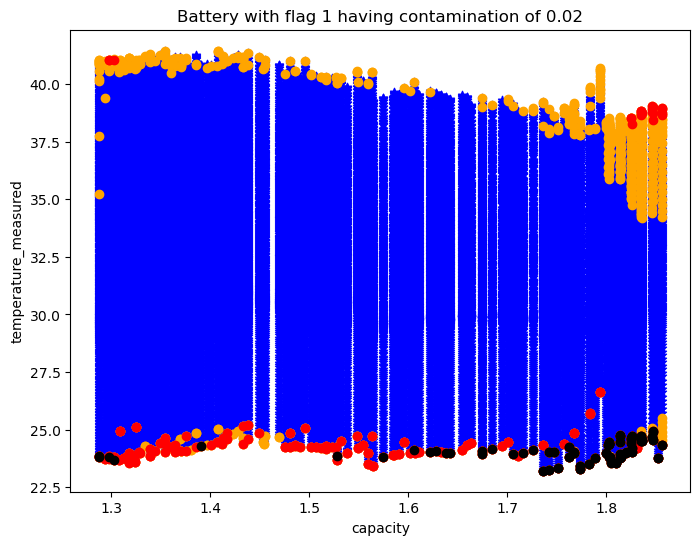

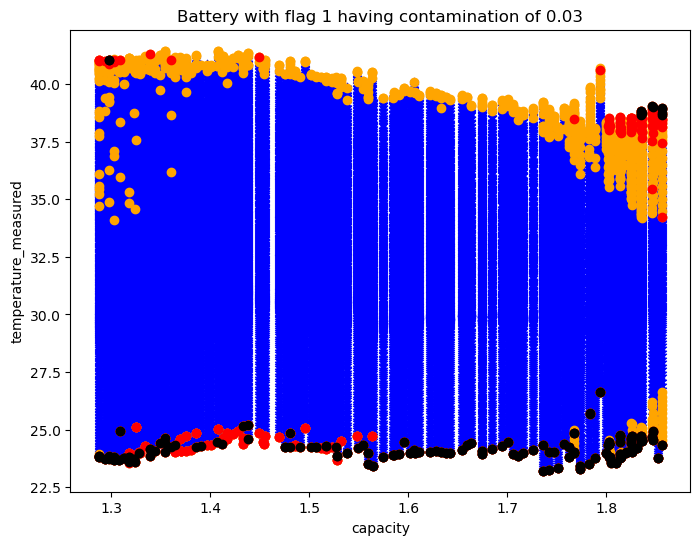

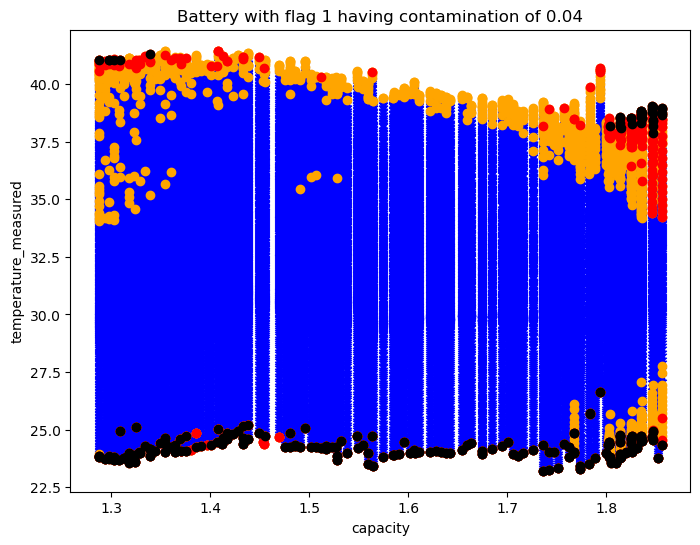

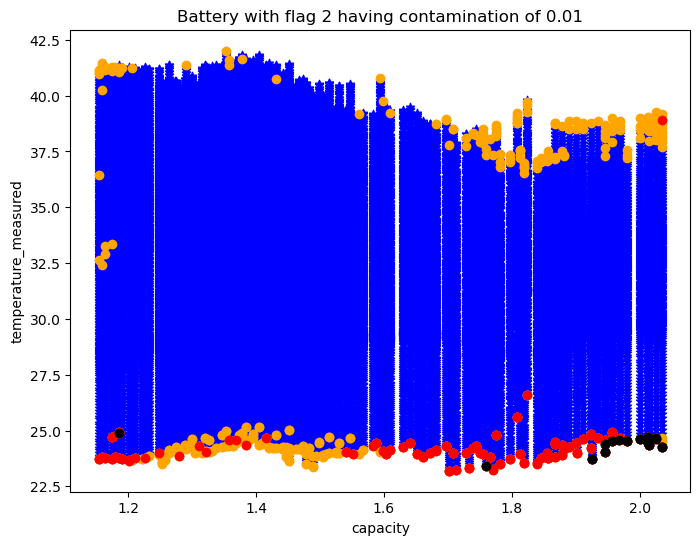

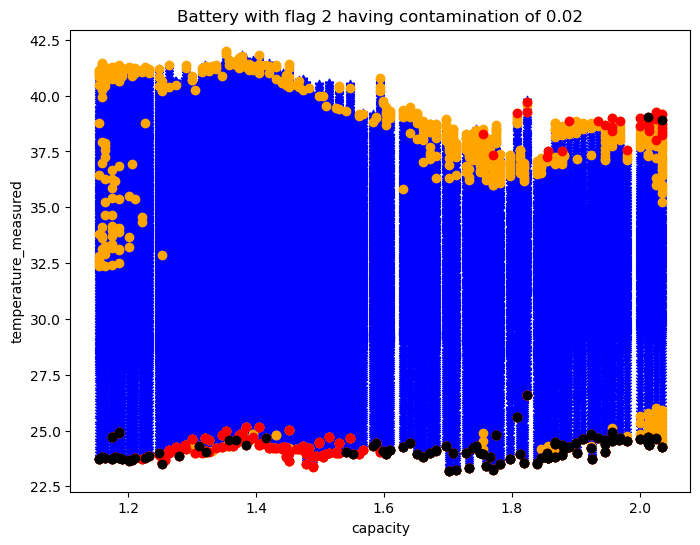

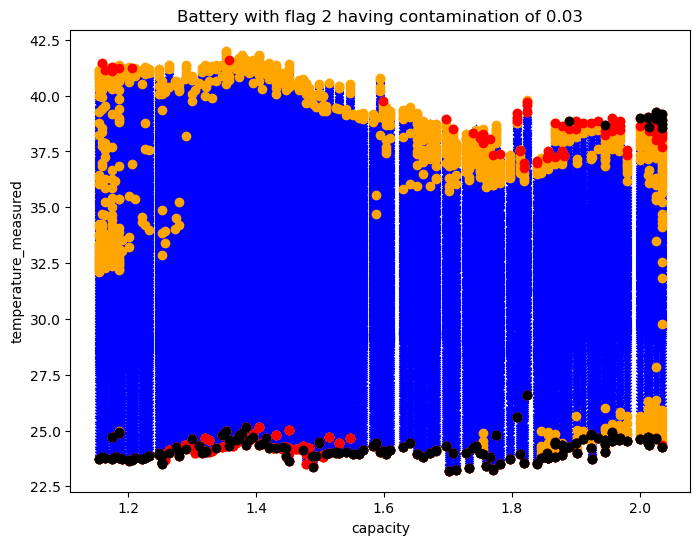

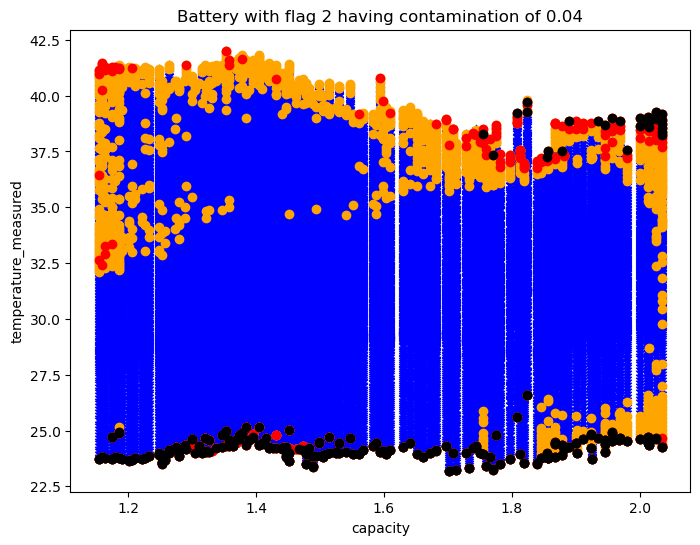

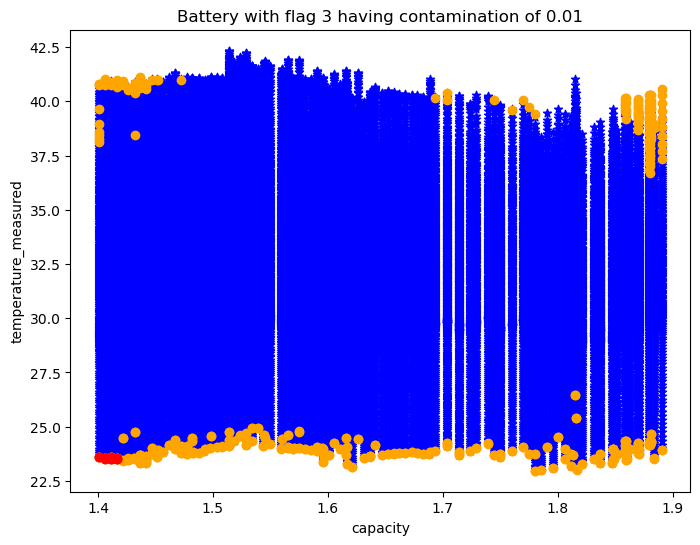

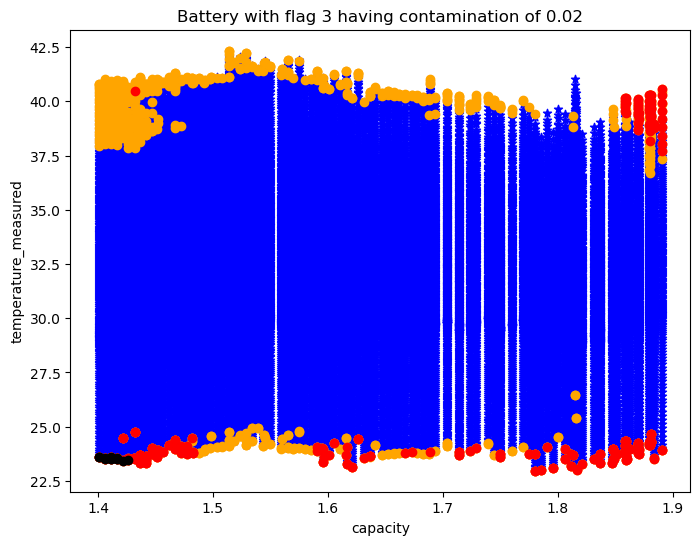

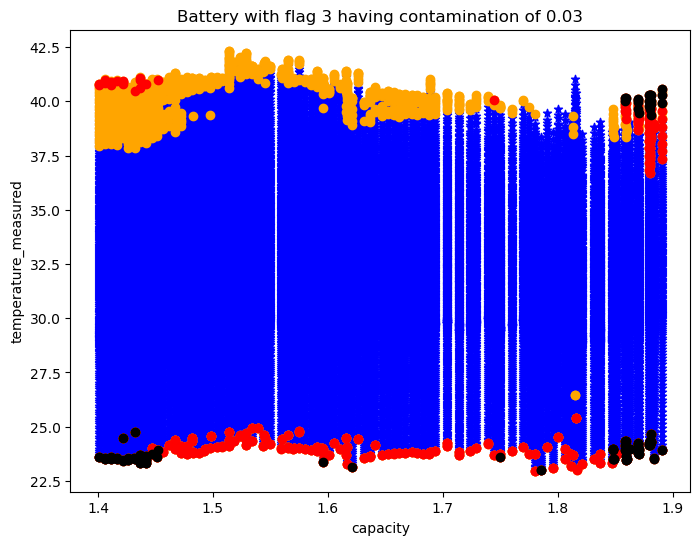

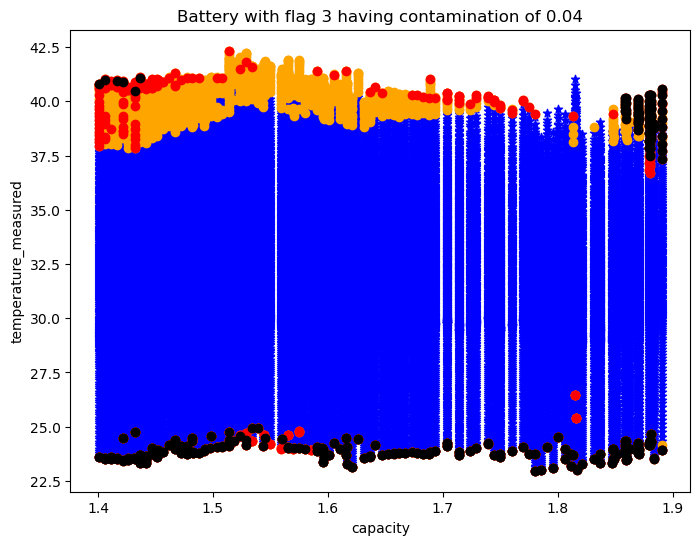

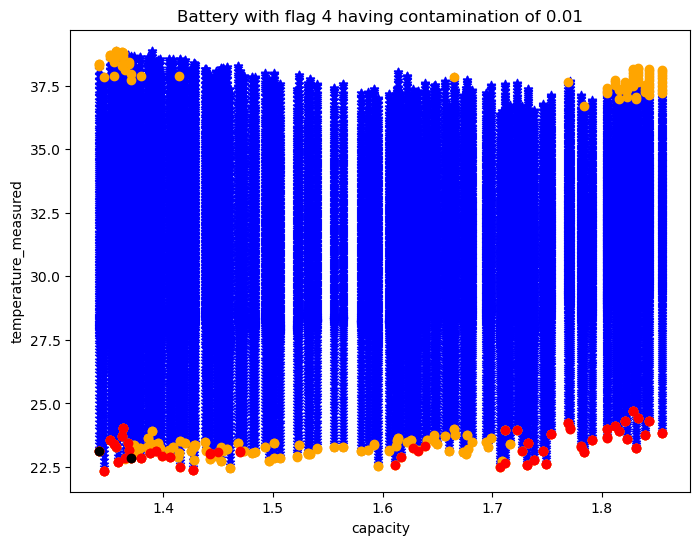

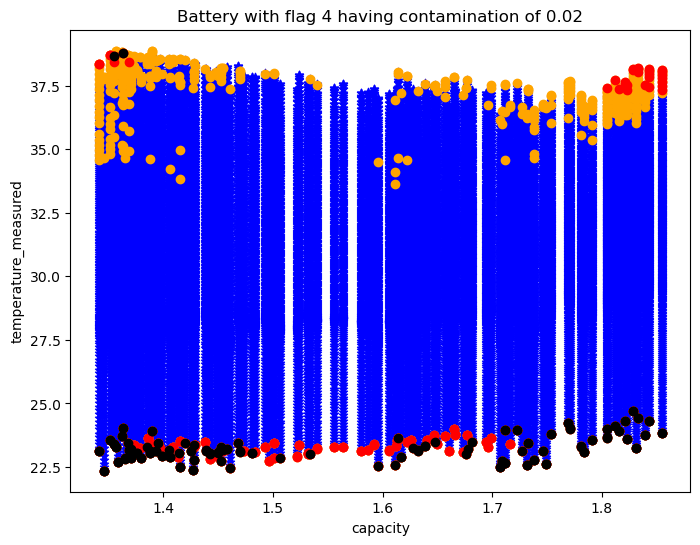

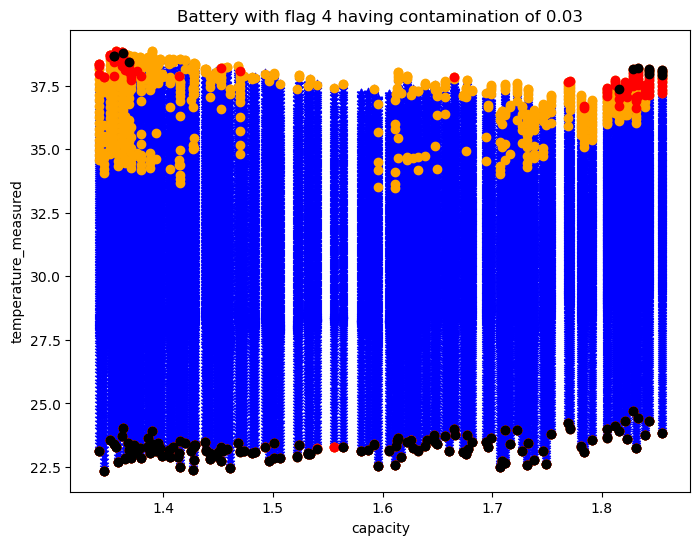

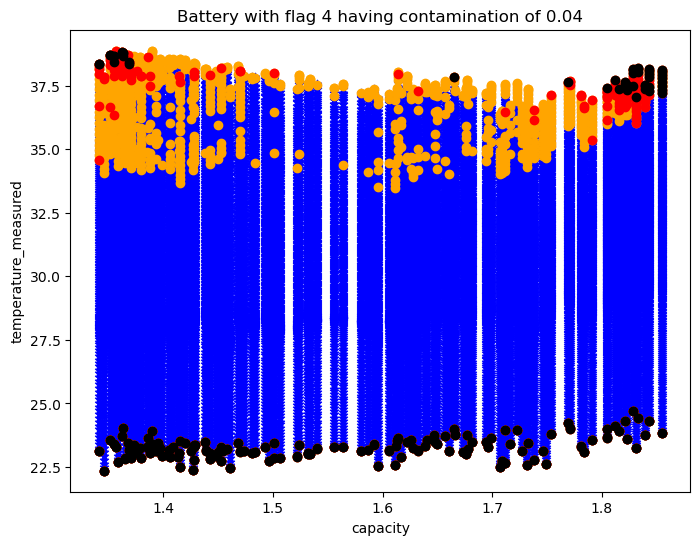

In [255]:
for i in flags_arr:
    for j in contamination_arr:
        wd = df_final_copy.loc[(df_final_copy['anomaly_score'+'_'+str(j)] == -1) & (df_final_copy['flag'] == i)]
        wd2 = df_final_copy.loc[(df_final_copy['anomaly_score'+'_'+str(j)] == -1) & (df_final_copy['flag'] == i) & (df_final_copy['scores'+'_'+str(j)]<-0.04)]
        wd3 = df_final_copy.loc[(df_final_copy['anomaly_score'+'_'+str(j)] == -1) & (df_final_copy['flag'] == i) & (df_final_copy['scores'+'_'+str(j)]<-0.06)]
        
        plt.figure(figsize=(8, 6))
        plt.scatter(df_final_copy[(df_final_copy['anomaly_score'+'_'+str(j)] == 1) & (df_final_copy['flag'] == i)]['capacity'],
                   df_final_copy[(df_final_copy['anomaly_score'+'_'+str(j)] == 1) & (df_final_copy['flag'] == i)]['temperature_measured'], c = 'blue', marker = "*")

        plt.scatter(wd['capacity'], wd['temperature_measured'], c = 'orange', marker = 'o')
        plt.scatter(wd2['capacity'], wd2['temperature_measured'], c = 'red', marker = 'o')
        plt.scatter(wd3['capacity'], wd3['temperature_measured'], c = 'black', marker = 'o')

        plt.xlabel('capacity')
        plt.ylabel('temperature_measured')
        plt.title('Battery with flag ' + str(i)+ ' having contamination of '+str(j))
        plt.show()

- The batteries with least temperature measured are having more number of outliers.
- Batteries with much higher capacities and much lower capacities but having minimum temperature measured are having most critical number of outliers
- WHereas as the batteries with least temperature measured are having more number of outliers.
- As we go on increase the contamination %, we are getting more number of datapoints classified as extreme outliers.

# 4. Local Outlier Factor(LOF) based Anomaly detection

In [256]:
lof_df = fuel_cells_df_copy2.copy()

In [257]:
fuel_cells_df_copy2

cycle             datetime  capacity  voltage_measured  \
0           1  1207149941000000000  1.856487          4.191492   
1           2  1207149941000000000  1.856487          4.190749   
2           3  1207149941000000000  1.856487          3.974871   
3           4  1207149941000000000  1.856487          3.951717   
4           5  1207149941000000000  1.856487          3.934352   
...       ...                  ...       ...               ...   
185716  34862  1219221439000000000  1.341051          3.443760   
185717  34863  1219221439000000000  1.341051          3.453271   
185718  34864  1219221439000000000  1.341051          3.461963   
185719  34865  1219221439000000000  1.341051          3.469907   
185720  34866  1219221439000000000  1.341051          3.477277   

        current_measured  temperature_measured  current_load  voltage_load  \
0              -0.004902             24.330034       -0.0006         0.000   
1              -0.001478             24.325993       -0.0006         4.206   
2              -2.012528             24.389085       -1.9982         3.062   
3              -2.013979             24.544752       -1.9982         3.030   
4              -2.011144             24.731385       -1.9982         3.011   
...                  ...                   ...           ...           ...   
185716         -0.002426             35.383979        0.0006         0.000   
185717         -0.000981             35.179732        0.0006         0.000   
185718          0.000209             34.977000        0.0006         0.000   
185719          0.001516             34.785943        0.0006         0.000   
185720         -0.001940             34.581660        0.0006         0.000   

            time  flag  
0          0.000     1  
1         16.781     1  
2         35.703     1  
3         53.781     1  
4         71.922     1  
...          ...   ...  
185716  2686.359     4  
185717  2700.546     4  
185718  2714.640     4  
185719  2728.750     4  
185720  2742.843     4  

[185721 rows x 10 columns]

In [258]:
n_neighbors = [5, 20]
contamination_arr = [0.01,0.04]
flags_arr = [1,2,3,4]

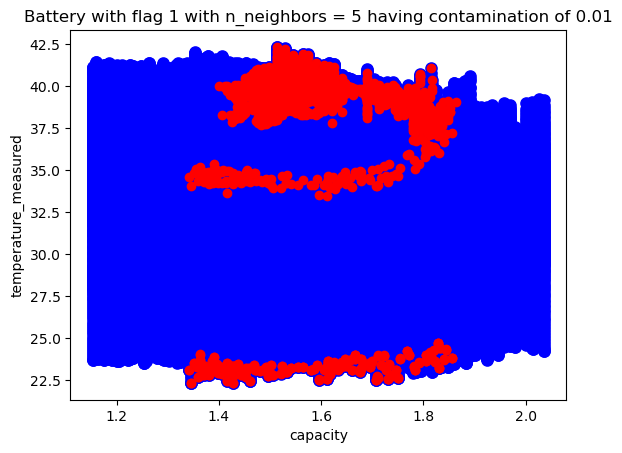

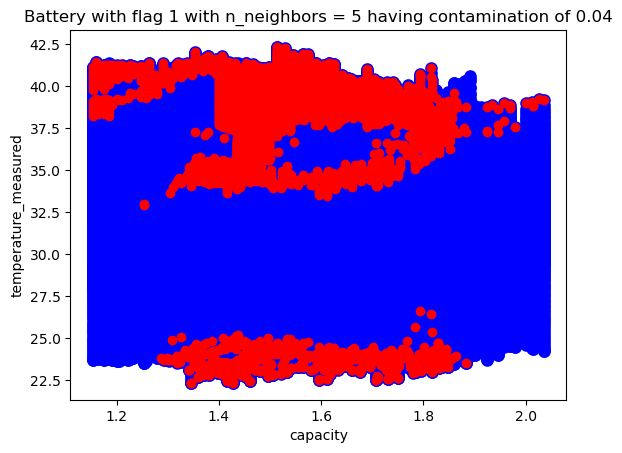

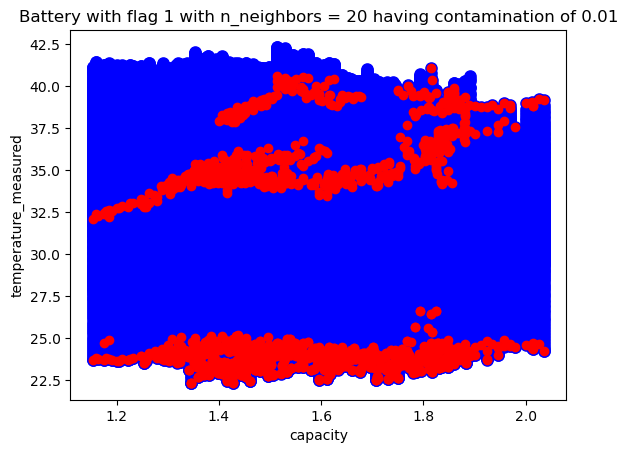

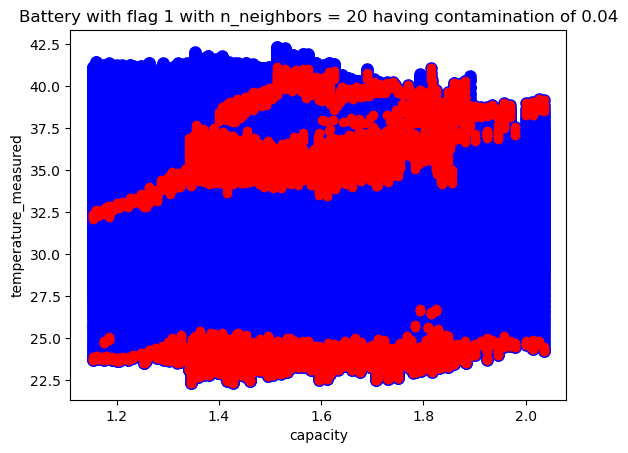

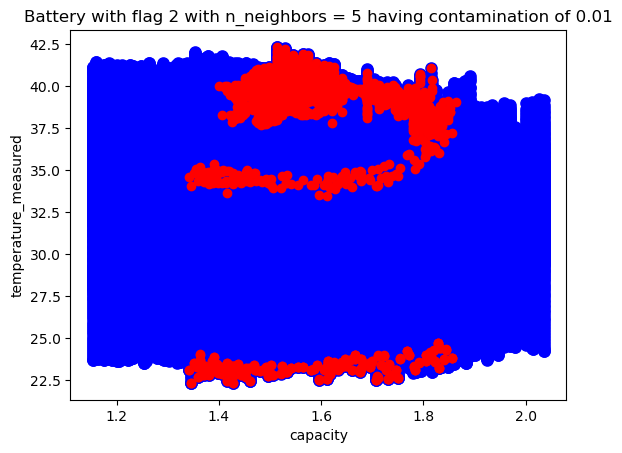

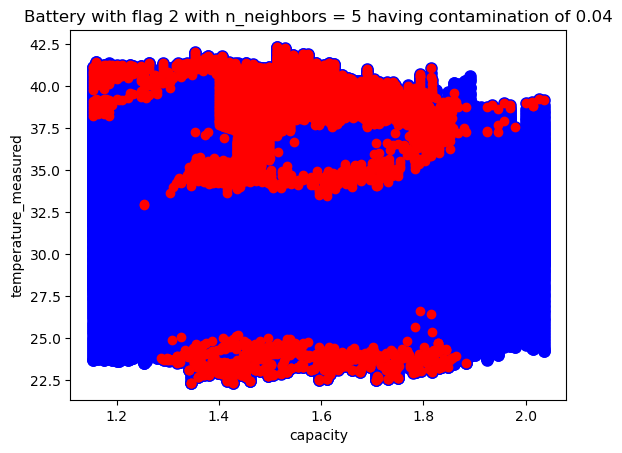

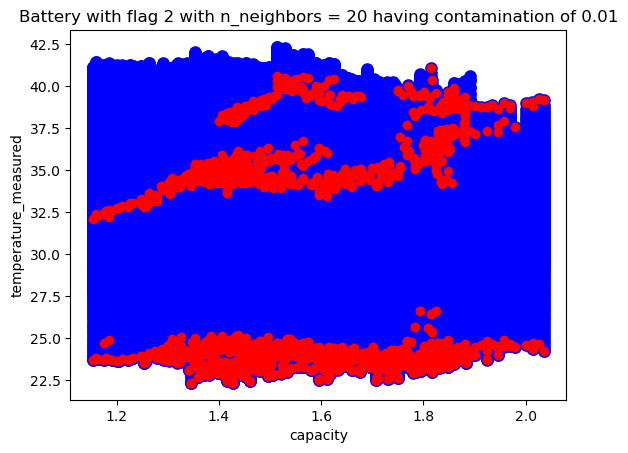

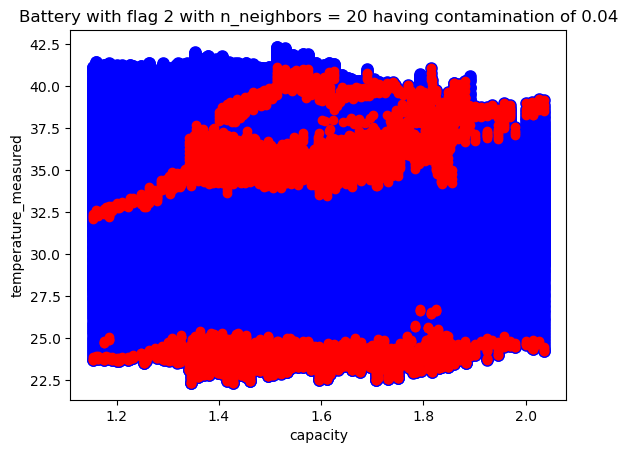

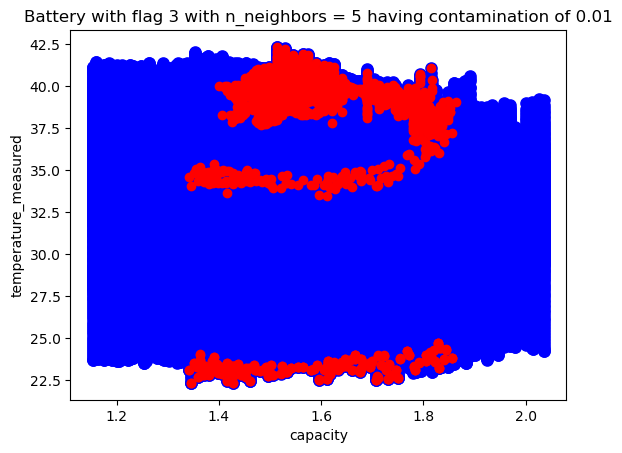

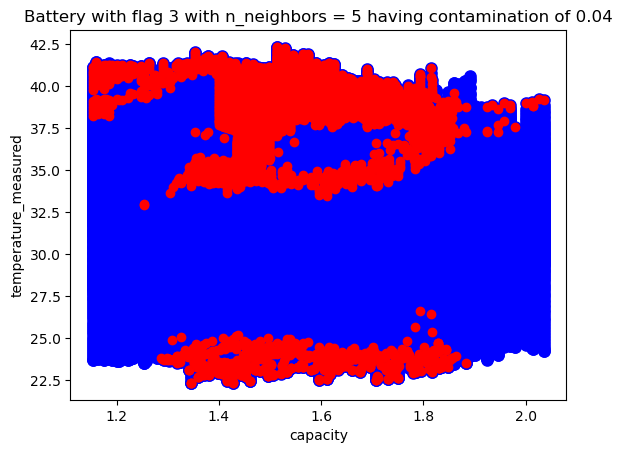

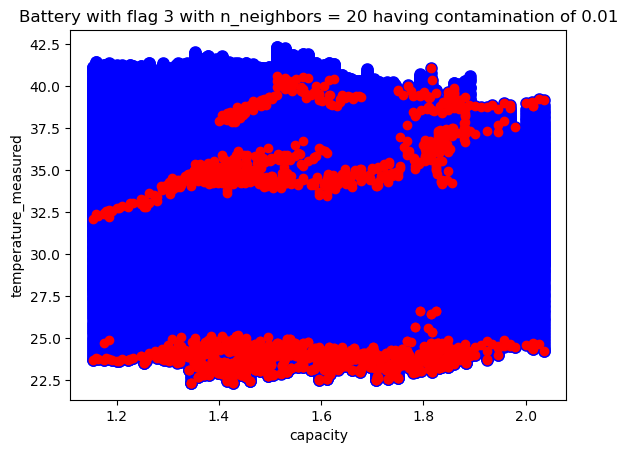

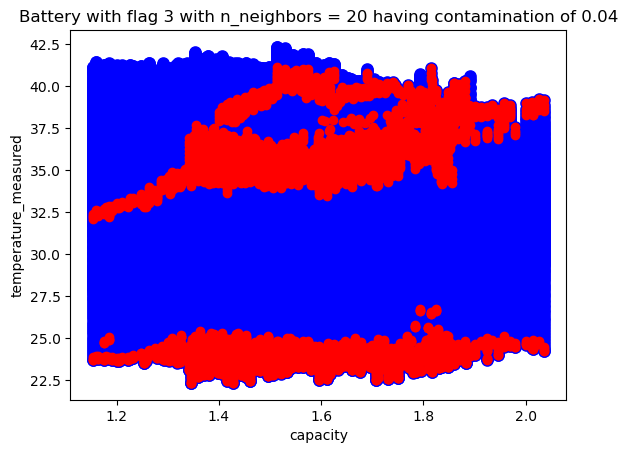

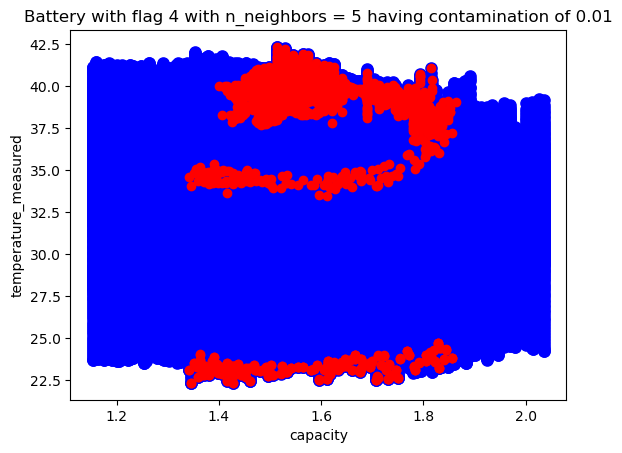

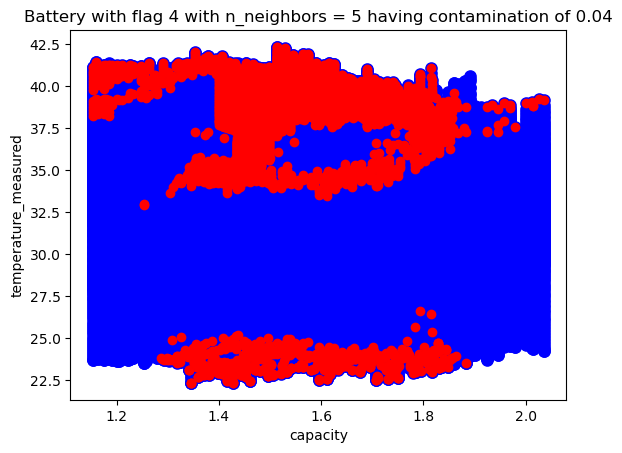

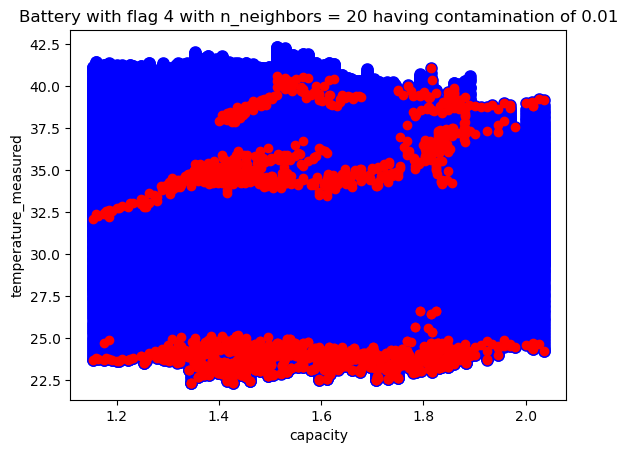

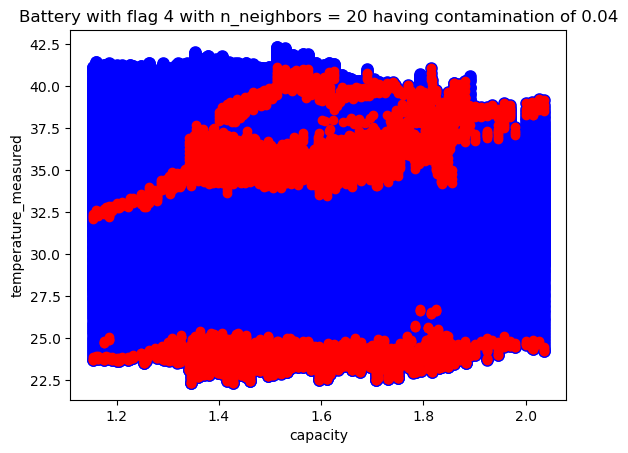

In [259]:
from sklearn.neighbors import LocalOutlierFactor
for f in flags_arr:
    for n in n_neighbors:
        for c in contamination_arr:
            # model specification
            model1 = LocalOutlierFactor(n_neighbors = n, metric = "manhattan", contamination = c)
            # model fitting
            y_pred = model1.fit_predict(fuel_cells_df_copy2)
            # filter outlier index
            outlier_index = np.where(y_pred == -1) # negative values are outliers and positives inliers
            # filter outlier values
            outlier_values = fuel_cells_df_copy2.iloc[outlier_index]
            # plot data
            plt.scatter(fuel_cells_df_copy2["capacity"], fuel_cells_df_copy2["temperature_measured"], color = "b", s = 65)
            # plot outlier values
            plt.scatter(outlier_values["capacity"], outlier_values["temperature_measured"], color = "r") 
            plt.xlabel('capacity')
            plt.ylabel('temperature_measured')
            plt.title('Battery with flag ' + str(f)+ ' with n_neighbors = '+ str(n)+' having contamination of '+str(c))
            plt.show()

- In LOF, the hypermeters used are n_neighbors = [5, 20] and contamination_ = [0.01,0.04].
- Almost 7429 datapoints are getting classified as outliers using maximum nearest neigbors (20) and with higesht contamination percentage of 4%.
- With least nearest neigbors and least contamination percentage, we are getting less no. of outliers specifically in the mid-battery capacity range (1.4-1.6) having least and maximum temperature measured. This can be informed to subject matter expert and thus can be validated before removal.


In [260]:
len(y_pred)

185721

In [261]:
fuel_cells_df_copy2

cycle             datetime  capacity  voltage_measured  \
0           1  1207149941000000000  1.856487          4.191492   
1           2  1207149941000000000  1.856487          4.190749   
2           3  1207149941000000000  1.856487          3.974871   
3           4  1207149941000000000  1.856487          3.951717   
4           5  1207149941000000000  1.856487          3.934352   
...       ...                  ...       ...               ...   
185716  34862  1219221439000000000  1.341051          3.443760   
185717  34863  1219221439000000000  1.341051          3.453271   
185718  34864  1219221439000000000  1.341051          3.461963   
185719  34865  1219221439000000000  1.341051          3.469907   
185720  34866  1219221439000000000  1.341051          3.477277   

        current_measured  temperature_measured  current_load  voltage_load  \
0              -0.004902             24.330034       -0.0006         0.000   
1              -0.001478             24.325993       -0.0006         4.206   
2              -2.012528             24.389085       -1.9982         3.062   
3              -2.013979             24.544752       -1.9982         3.030   
4              -2.011144             24.731385       -1.9982         3.011   
...                  ...                   ...           ...           ...   
185716         -0.002426             35.383979        0.0006         0.000   
185717         -0.000981             35.179732        0.0006         0.000   
185718          0.000209             34.977000        0.0006         0.000   
185719          0.001516             34.785943        0.0006         0.000   
185720         -0.001940             34.581660        0.0006         0.000   

            time  flag  
0          0.000     1  
1         16.781     1  
2         35.703     1  
3         53.781     1  
4         71.922     1  
...          ...   ...  
185716  2686.359     4  
185717  2700.546     4  
185718  2714.640     4  
185719  2728.750     4  
185720  2742.843     4  

[185721 rows x 10 columns]

In [262]:
y_pred_df = pd.DataFrame(data=y_pred,columns=['y_pred'])
fuel_cells_df_copy2_final_lof = pd.concat([fuel_cells_df_copy2,y_pred_df],axis = 1)
fuel_cells_df_copy2_final_lof

cycle             datetime  capacity  voltage_measured  \
0           1  1207149941000000000  1.856487          4.191492   
1           2  1207149941000000000  1.856487          4.190749   
2           3  1207149941000000000  1.856487          3.974871   
3           4  1207149941000000000  1.856487          3.951717   
4           5  1207149941000000000  1.856487          3.934352   
...       ...                  ...       ...               ...   
185716  34862  1219221439000000000  1.341051          3.443760   
185717  34863  1219221439000000000  1.341051          3.453271   
185718  34864  1219221439000000000  1.341051          3.461963   
185719  34865  1219221439000000000  1.341051          3.469907   
185720  34866  1219221439000000000  1.341051          3.477277   

        current_measured  temperature_measured  current_load  voltage_load  \
0              -0.004902             24.330034       -0.0006         0.000   
1              -0.001478             24.325993       -0.0006         4.206   
2              -2.012528             24.389085       -1.9982         3.062   
3              -2.013979             24.544752       -1.9982         3.030   
4              -2.011144             24.731385       -1.9982         3.011   
...                  ...                   ...           ...           ...   
185716         -0.002426             35.383979        0.0006         0.000   
185717         -0.000981             35.179732        0.0006         0.000   
185718          0.000209             34.977000        0.0006         0.000   
185719          0.001516             34.785943        0.0006         0.000   
185720         -0.001940             34.581660        0.0006         0.000   

            time  flag  y_pred  
0          0.000     1      -1  
1         16.781     1      -1  
2         35.703     1      -1  
3         53.781     1      -1  
4         71.922     1       1  
...          ...   ...     ...  
185716  2686.359     4      -1  
185717  2700.546     4      -1  
185718  2714.640     4      -1  
185719  2728.750     4      -1  
185720  2742.843     4      -1  

[185721 rows x 11 columns]

In [263]:
# No. of outliers when we are considering the highest contamoination i.e 4 %

fuel_cells_df_copy2_final_lof[fuel_cells_df_copy2_final_lof['y_pred'] == -1]

cycle             datetime  capacity  voltage_measured  \
0           1  1207149941000000000  1.856487          4.191492   
1           2  1207149941000000000  1.856487          4.190749   
2           3  1207149941000000000  1.856487          3.974871   
3           4  1207149941000000000  1.856487          3.951717   
193       194  1207149941000000000  1.856487          3.264121   
...       ...                  ...       ...               ...   
185716  34862  1219221439000000000  1.341051          3.443760   
185717  34863  1219221439000000000  1.341051          3.453271   
185718  34864  1219221439000000000  1.341051          3.461963   
185719  34865  1219221439000000000  1.341051          3.469907   
185720  34866  1219221439000000000  1.341051          3.477277   

        current_measured  temperature_measured  current_load  voltage_load  \
0              -0.004902             24.330034       -0.0006         0.000   
1              -0.001478             24.325993       -0.0006         4.206   
2              -2.012528             24.389085       -1.9982         3.062   
3              -2.013979             24.544752       -1.9982         3.030   
193            -0.001532             35.021738       -0.0006         0.000   
...                  ...                   ...           ...           ...   
185716         -0.002426             35.383979        0.0006         0.000   
185717         -0.000981             35.179732        0.0006         0.000   
185718          0.000209             34.977000        0.0006         0.000   
185719          0.001516             34.785943        0.0006         0.000   
185720         -0.001940             34.581660        0.0006         0.000   

            time  flag  y_pred  
0          0.000     1      -1  
1         16.781     1      -1  
2         35.703     1      -1  
3         53.781     1      -1  
193     3628.953     1      -1  
...          ...   ...     ...  
185716  2686.359     4      -1  
185717  2700.546     4      -1  
185718  2714.640     4      -1  
185719  2728.750     4      -1  
185720  2742.843     4      -1  

[7429 rows x 11 columns]

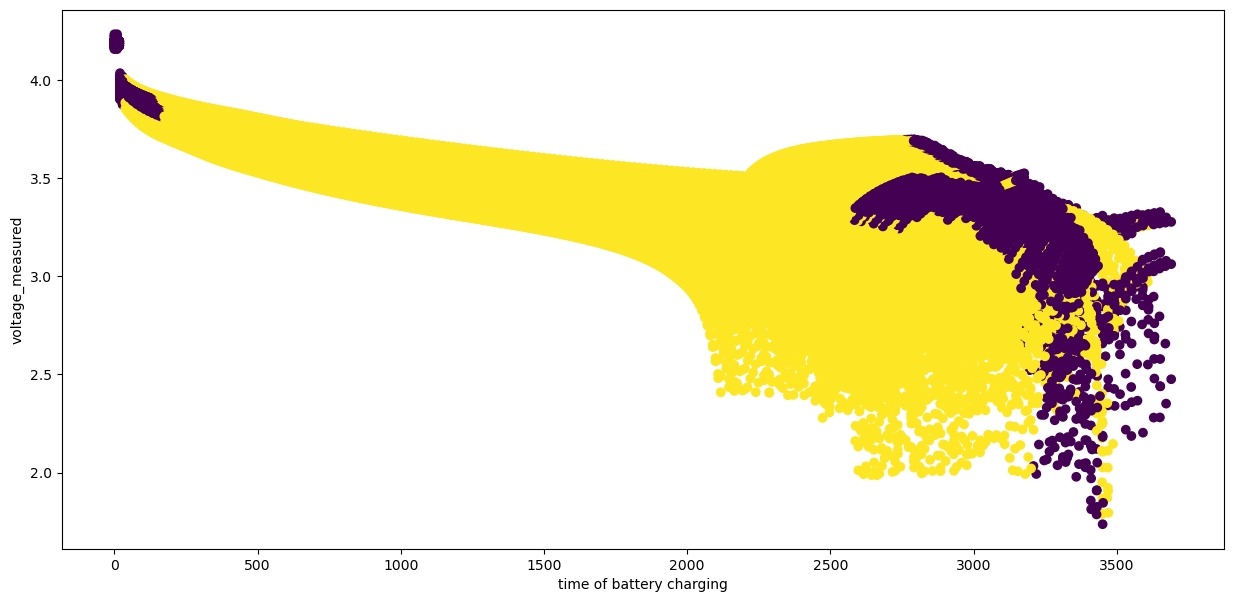

In [264]:
plt.figure(figsize=(15, 7))
plt.scatter(fuel_cells_df_copy2_final_lof['time'], fuel_cells_df_copy2_final_lof['voltage_measured'], c=fuel_cells_df_copy2_final_lof['y_pred'])
plt.xlabel('time of battery charging')
plt.ylabel('voltage_measured')
plt.show()

- I have validated visually in lower dimension with above hyperparameters but the performance is less acuurate than Isolation Forest but more accurate than other methods.

# 5. Elliptical Envelope based Anomaly detection

In [265]:
eliptical_df = fuel_cells_df_copy2.copy()

In [266]:
from sklearn.preprocessing import StandardScaler
cols = ['cycle', 'datetime', 'capacity', 'voltage_measured', 'current_measured',
       'temperature_measured', 'current_load', 'voltage_load', 'time', 'flag']
scaler = StandardScaler()

eliptical_df[cols] = scaler.fit_transform(eliptical_df[cols])
eliptical_df.head()

cycle  datetime  capacity  voltage_measured  current_measured  \
0 -1.678666 -1.424022  1.477315          2.758442          3.255533   
1 -1.678595 -1.424022  1.477315          2.755491          3.261632   
2 -1.678524 -1.424022  1.477315          1.897777         -0.320553   
3 -1.678453 -1.424022  1.477315          1.805782         -0.323138   
4 -1.678383 -1.424022  1.477315          1.736792         -0.318086   

   temperature_measured  current_load  voltage_load      time      flag  
0             -1.998389     -1.194938     -3.149552 -1.705022 -1.281811  
1             -1.999392     -1.194938      2.448187 -1.686519 -1.281811  
2             -1.983728     -2.823146      0.925645 -1.665656 -1.281811  
3             -1.945079     -2.823146      0.883056 -1.645723 -1.281811  
4             -1.898742     -2.823146      0.857769 -1.625721 -1.281811

In [267]:
from sklearn.model_selection import train_test_split

In [268]:
X_train, X_test= train_test_split(eliptical_df, test_size=0.33, random_state=42)

In [269]:
# convert tarin dataframe to arrays
data = X_train[cols].values

In [219]:

from sklearn.covariance import EllipticEnvelope
# instantiate model
model1 = EllipticEnvelope(contamination = 0.1) 
# fit model
model1.fit(data)

EllipticEnvelope()

In [ ]:

new_data = X_test[cols].values

In [ ]:

pred1 = model1.predict(new_data)
print(pred1)

[1 1 1 ... 1 1 1]


In [222]:
len(new_data)

61288

In [223]:
len(pred1)

61288

In [224]:
pred_df = pd.DataFrame(data=pred1,columns=['pred1'])
fuel_cells_df_copy2_final_eliptical = pd.concat([X_test,pred_df],axis = 1)


In [225]:
pred_df

pred1
0          1
1          1
2          1
3          1
4          1
...      ...
61283      1
61284      1
61285      1
61286      1
61287      1

[61288 rows x 1 columns]

In [226]:
X_test

cycle  datetime  capacity  voltage_measured  current_measured  \
94986   1.488209  0.026246 -1.686115         -0.469938         -0.319177   
182194  0.541568  2.434538 -0.990579         -3.487875         -0.314516   
96713   1.610559  0.064419 -1.852381          0.757447         -0.314559   
86446   0.883186 -0.156326 -1.028915         -0.553402         -0.320190   
134163  0.701254 -0.221676 -0.240105          0.502181         -0.281645   
...          ...       ...       ...               ...               ...   
170230 -0.306030  2.066050 -0.181811          0.419846         -0.314026   
68294  -0.402805 -0.553487 -0.040528         -0.462780         -0.316967   
184683  0.717903  2.536516 -1.081689         -2.332737         -0.315089   
32289   0.608871 -0.244885 -0.660021          0.863215         -0.322651   
88361   1.018856 -0.121309 -1.278001         -1.101655         -0.317462   

        temperature_measured  current_load  voltage_load      time      flag  
94986              -0.111202      0.434900      0.140418 -0.536915 -0.349901  
182194              1.460708      0.434574     -0.832466  1.052468  1.513919  
96713              -1.444924      0.434737      0.539686 -1.445689 -0.349901  
86446               0.545350      0.434900      0.111138 -0.092657 -0.349901  
134163             -0.370104      0.435715      0.426560 -0.723166  0.582009  
...                      ...           ...           ...       ...       ...  
170230             -0.877855      0.434737      0.438538 -0.639903  1.513919  
68294               0.421779      0.434900      0.144410  0.476073 -0.349901  
184683              1.169705      0.434737     -0.478448  0.957214  1.513919  
32289              -0.574446      0.434248      0.486450 -1.146181 -1.281811  
88361               1.188723      0.434900     -0.075187  0.423009 -0.349901  

[61288 rows x 10 columns]

In [227]:
fuel_cells_df_copy2_final_eliptical[fuel_cells_df_copy2_final_eliptical['pred1'] == -1].shape

(5943, 11)

In [228]:
# predict on all data 
all_data = eliptical_df[cols].values
pred2 = model1.predict(all_data)
print(pred2)

[ 1  1 -1 ... -1 -1 -1]


In [229]:
len(pred2)

185721

In [230]:
len(all_data)

185721

In [231]:
pred_df_all = pd.DataFrame(data=pred2,columns=['pred2'])
final_eliptical = pd.concat([fuel_cells_df_copy2,pred_df_all],axis = 1)
final_eliptical

cycle             datetime  capacity  voltage_measured  \
0           1  1207149941000000000  1.856487          4.191492   
1           2  1207149941000000000  1.856487          4.190749   
2           3  1207149941000000000  1.856487          3.974871   
3           4  1207149941000000000  1.856487          3.951717   
4           5  1207149941000000000  1.856487          3.934352   
...       ...                  ...       ...               ...   
185716  34862  1219221439000000000  1.341051          3.443760   
185717  34863  1219221439000000000  1.341051          3.453271   
185718  34864  1219221439000000000  1.341051          3.461963   
185719  34865  1219221439000000000  1.341051          3.469907   
185720  34866  1219221439000000000  1.341051          3.477277   

        current_measured  temperature_measured  current_load  voltage_load  \
0              -0.004902             24.330034       -0.0006         0.000   
1              -0.001478             24.325993       -0.0006         4.206   
2              -2.012528             24.389085       -1.9982         3.062   
3              -2.013979             24.544752       -1.9982         3.030   
4              -2.011144             24.731385       -1.9982         3.011   
...                  ...                   ...           ...           ...   
185716         -0.002426             35.383979        0.0006         0.000   
185717         -0.000981             35.179732        0.0006         0.000   
185718          0.000209             34.977000        0.0006         0.000   
185719          0.001516             34.785943        0.0006         0.000   
185720         -0.001940             34.581660        0.0006         0.000   

            time  flag  pred2  
0          0.000     1      1  
1         16.781     1      1  
2         35.703     1     -1  
3         53.781     1     -1  
4         71.922     1     -1  
...          ...   ...    ...  
185716  2686.359     4     -1  
185717  2700.546     4     -1  
185718  2714.640     4     -1  
185719  2728.750     4     -1  
185720  2742.843     4     -1  

[185721 rows x 11 columns]

In [232]:
final_eliptical[final_eliptical['pred2'] == -1]

cycle             datetime  capacity  voltage_measured  \
2           3  1207149941000000000  1.856487          3.974871   
3           4  1207149941000000000  1.856487          3.951717   
4           5  1207149941000000000  1.856487          3.934352   
5           6  1207149941000000000  1.856487          3.920058   
6           7  1207149941000000000  1.856487          3.907904   
...       ...                  ...       ...               ...   
185716  34862  1219221439000000000  1.341051          3.443760   
185717  34863  1219221439000000000  1.341051          3.453271   
185718  34864  1219221439000000000  1.341051          3.461963   
185719  34865  1219221439000000000  1.341051          3.469907   
185720  34866  1219221439000000000  1.341051          3.477277   

        current_measured  temperature_measured  current_load  voltage_load  \
2              -2.012528             24.389085       -1.9982         3.062   
3              -2.013979             24.544752       -1.9982         3.030   
4              -2.011144             24.731385       -1.9982         3.011   
5              -2.013007             24.909816       -1.9982         2.991   
6              -2.014400             25.105884       -1.9982         2.977   
...                  ...                   ...           ...           ...   
185716         -0.002426             35.383979        0.0006         0.000   
185717         -0.000981             35.179732        0.0006         0.000   
185718          0.000209             34.977000        0.0006         0.000   
185719          0.001516             34.785943        0.0006         0.000   
185720         -0.001940             34.581660        0.0006         0.000   

            time  flag  pred2  
2         35.703     1     -1  
3         53.781     1     -1  
4         71.922     1     -1  
5         90.094     1     -1  
6        108.281     1     -1  
...          ...   ...    ...  
185716  2686.359     4     -1  
185717  2700.546     4     -1  
185718  2714.640     4     -1  
185719  2728.750     4     -1  
185720  2742.843     4     -1  

[18387 rows x 11 columns]

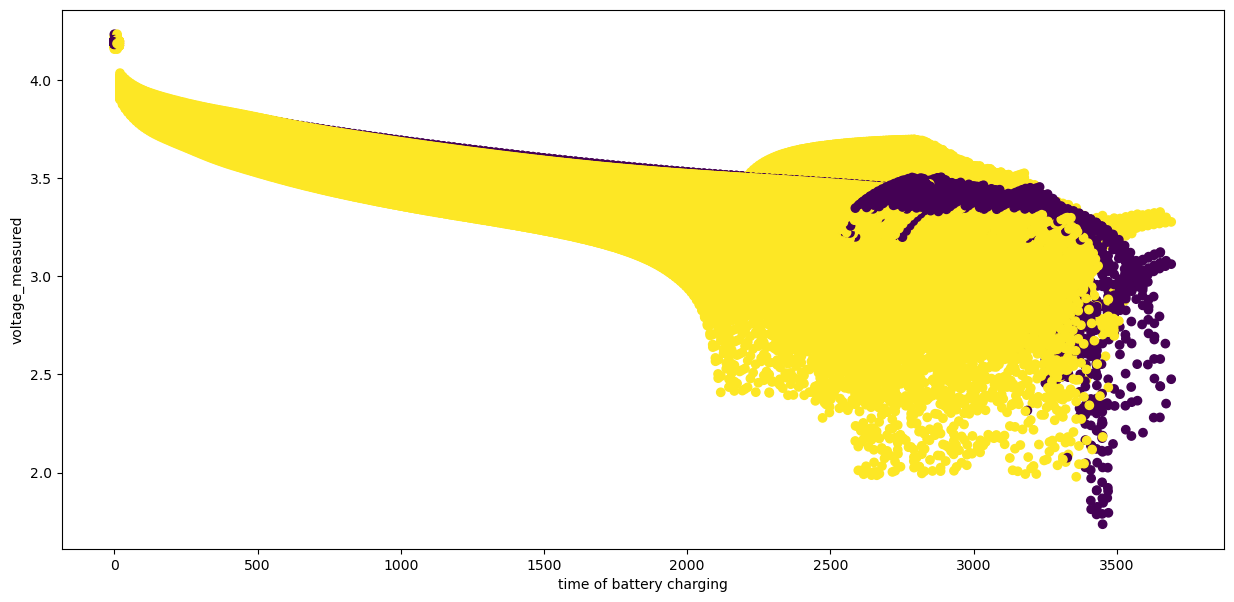

In [233]:
plt.figure(figsize=(15, 7))
plt.scatter(final_eliptical['time'], final_eliptical['voltage_measured'], c=final_eliptical['pred2'])
plt.xlabel('time of battery charging')
plt.ylabel('voltage_measured')
plt.show()

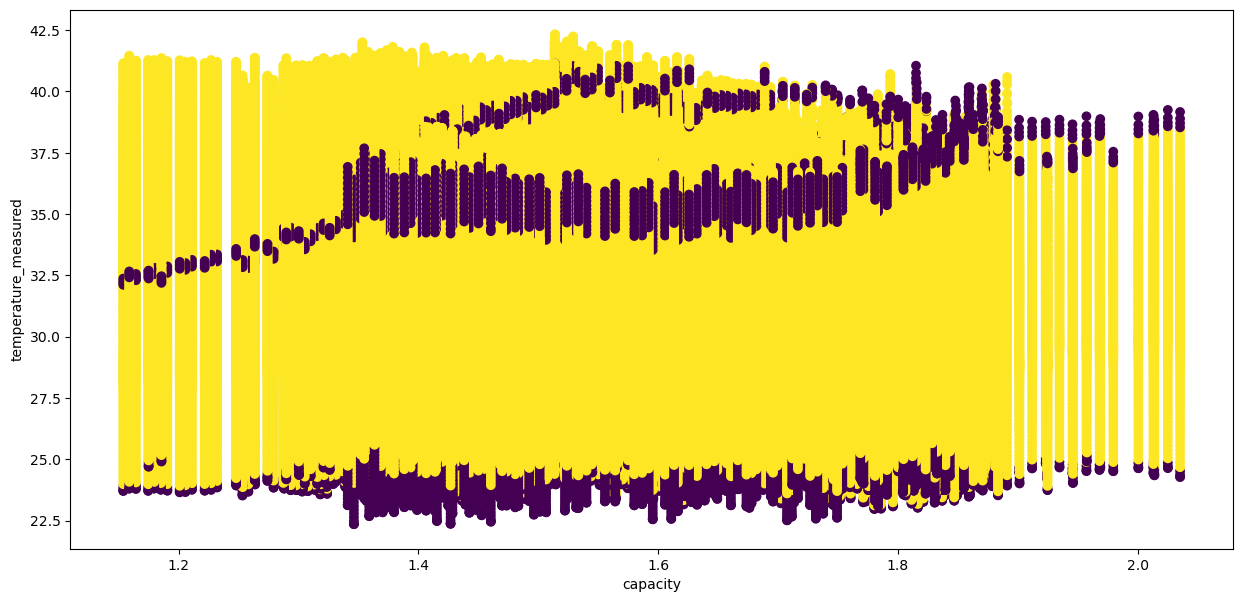

In [234]:
plt.figure(figsize=(15, 7))
plt.scatter(fuel_cells_df_copy2_final_lof['capacity'], fuel_cells_df_copy2_final_lof['temperature_measured'], c=fuel_cells_df_copy2_final_lof['y_pred'])
plt.xlabel('capacity')
plt.ylabel('temperature_measured')
plt.show()

# Comparison of results from the above algorithms:


- 1. IQR based
- 2. DBSCAN (density based)
- 3. Isolation Forest ()
- 4. Local Outlier Factor (LOF)
- 5. Elliptical Envelope


### 1. IQR based
- As we have see, total **37,766 datapoints (20.13% data) are tagged as outliers** using IQR based method.
- This data is huge and might contain some useful information as well, so it's better to treat/ detect outliers with some robust and SOTA methods of anomaly detection. ( worst performer )

### 2. DBSCAN (density based)
- **eps = 0.5, min_samples = 200**. With this, detect **8009 datapoints as outliers**. Have validated visually in lower dimension with above hyperparameters.

### 3. Isolation Forest
- Anomalies with contamination **1%, 2%, 3%, 4% are 1858, 3716, 5573, 7431 respectievly**.
- Even with the least contamination %, we are able to get the exact no. of outliers which I have validated visually in lower dimension with different different set of features.
- However, **as per the subject matter expert we can still get it validated** if certain points are anamlalies or not, but we are getting good match.
- We can easily further classify the outliers into **good, average and extreme anaamloes.**
- As we go on increasing the contamination %, we are getting more number of datapoints classified as extreme outliers.

### 4. Local Outlier Factor (LOF)
- In LOF, the hypermeters used are n_neighbors = [5, 20] and contamination_ = [0.01,0.04].
- Almost **7429 datapoints are getting classified as outliers** using **maximum nearest neigbors (20) and with higesht contamination percentage of 4%.**
- I have validated visually in lower dimension with above hyperparameters but the performance is less acuurate than Isolation Forest but more accurate than other methods.
- With least nearest neigbors and least contamination percentage, we are getting less no. of outliers specifically in the mid-battery capacity range (1.4-1.6) having least and maximum temperature measured. This can be informed to subject matter expert and thus can be validated before removal.
- Along with extreme endpoints, the mid level inliers are also considered as outliers upon increasing contamination% upto 4% in bivariate analysis of temperature vs capacity

### 5. Elliptical Envelope
- Providing contamination as hyperparametr, **18387 data points labelled (-1) i.e outliers.**
- Along with extreme endpoints, the mid level inliers are also considered as outliers even in lower contamination% of 1 % in bivariate analysis of temperature vs capacity

### Final performance conclusions:
#### Isolation Forest >>  Local Outlier Factor (LOF) >  DBSCAN (density based) >  Elliptical Envelope >> IQR based